In [1]:
import pandas as pd
import numpy as np
import json
import re
from matplotlib import pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as lm

In [2]:
df_3 = pd.read_csv('df_clean.csv')

In [3]:
df_3.head()

,title,price,sales,seller_rating,CPU,cores,RAM,size_of_RAM_GB,size_of_HDD_GB,size_of_SSD_GB,Видеопроцессор,Операционная система,Страна производства,Гарантийный срок(мес.)
0,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400,0.0,Intel other,2.0,DDR 3,4,NaN,NaN,intel,отсутствует,Россия,36
1,Системный блок,32900,0,0.0,Intel Core i5,NaN,не заполнено,16,NaN,240-256,NaN,отсутствует,Китай,0
2,Компьютер Hp Prodesk 400 g6 mt,35720,0,0.0,NaN,NaN,не заполнено,16,NaN,480-512,NaN,отсутствует,не указано,0
3,Офисный Компьютер Robotcomp Казначей V1,39237,10,4.7,Intel Core i5,6.0,DDR 4,8,NaN,480-512,intel,windows trial,Россия,36
4,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200,4.7,Intel Core i5,6.0,DDR 4,16,NaN,960-1024,nvidia geforce gtx 1660,windows trial,Россия,36


## Кодировка значений

### size_of_SSD_GB

In [4]:
df_3['size_of_SSD_GB'].value_counts()

size_of_SSD_GB
480-512     1550
960-1024     897
240-256      641
120-128      187
200           44
16             1
60             1
Name: count, dtype: int64

Малочисленные значения удаляем, остальные кодиуем и приводим к формату int.

In [5]:
df_3 = df_3[(df_3['size_of_SSD_GB'] != '200') & (df_3['size_of_SSD_GB'] != '16') & (df_3['size_of_SSD_GB'] != '60')]
df_3['size_of_SSD_GB'].value_counts()

size_of_SSD_GB
480-512     1550
960-1024     897
240-256      641
120-128      187
Name: count, dtype: int64

In [6]:
dict_ssd = {
    "120-128": 120,
    "240-256": 250,
    "480-512": 500,
    "960-1024": 1000
    }

In [7]:
df_3['size_of_SSD_GB'] = df_3['size_of_SSD_GB'].replace(dict_ssd)
df_3.head()

,title,price,sales,seller_rating,CPU,cores,RAM,size_of_RAM_GB,size_of_HDD_GB,size_of_SSD_GB,Видеопроцессор,Операционная система,Страна производства,Гарантийный срок(мес.)
0,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400,0.0,Intel other,2.0,DDR 3,4,NaN,NaN,intel,отсутствует,Россия,36
1,Системный блок,32900,0,0.0,Intel Core i5,NaN,не заполнено,16,NaN,250.0,NaN,отсутствует,Китай,0
2,Компьютер Hp Prodesk 400 g6 mt,35720,0,0.0,NaN,NaN,не заполнено,16,NaN,500.0,NaN,отсутствует,не указано,0
3,Офисный Компьютер Robotcomp Казначей V1,39237,10,4.7,Intel Core i5,6.0,DDR 4,8,NaN,500.0,intel,windows trial,Россия,36
4,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200,4.7,Intel Core i5,6.0,DDR 4,16,NaN,1000.0,nvidia geforce gtx 1660,windows trial,Россия,36


In [8]:
df_3['size_of_SSD_GB'].dtype

dtype('float64')

### RAM

In [97]:
df_ram = df_3[df_3['RAM'] != 'не заполнено']
df_ram.head()

,title,price_rur,sales,seller_rating,CPU,cores,RAM,size_of_RAM_GB,size_of_HDD_GB,size_of_SSD_GB,Видеопроцессор,Операционная система,Страна производства,Гарантийный срок(мес.)
0,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400,0.0,Intel other,2.0,DDR 3,4,NaN,NaN,intel,отсутствует,Россия,36
3,Офисный Компьютер Robotcomp Казначей V1,39237,10,4.7,Intel Core i5,6.0,DDR 4,8,NaN,500.0,intel,windows trial,Россия,36
4,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200,4.7,Intel Core i5,6.0,DDR 4,16,NaN,1000.0,nvidia geforce gtx 1660,windows trial,Россия,36
5,Игровой Компьютер Robotcomp M-16 V1,55625,40,4.7,Intel Core i5,6.0,DDR 4,16,NaN,500.0,nvidia geforce gtx 1650,windows trial,Россия,36
6,Игровой Компьютер Robotcomp Анаконда 2.0 V1,128284,5,4.7,Intel Core i5,10.0,DDR 4,16,NaN,1000.0,nvidia geforce rtx 3070,windows trial,Россия,36


In [ ]:
df_3.

# Разведочный анализ

## Типы данных в датасете

In [9]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3323 entries, 0 to 3368
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3323 non-null   object 
 1   price                   3323 non-null   int64  
 2   sales                   3323 non-null   int64  
 3   seller_rating           3323 non-null   float64
 4   CPU                     3238 non-null   object 
 5   cores                   3311 non-null   float64
 6   RAM                     3323 non-null   object 
 7   size_of_RAM_GB          3323 non-null   int64  
 8   size_of_HDD_GB          1088 non-null   float64
 9   size_of_SSD_GB          3275 non-null   float64
 10  Видеопроцессор          3264 non-null   object 
 11  Операционная система    3323 non-null   object 
 12  Страна производства     3323 non-null   object 
 13  Гарантийный срок(мес.)  3323 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usa

Определим типы данных для каждого признака в датасете df_3:

1. title (наименование ПК) - категориальный тип + дискретная шкала
2. price_rur (цена в рублях) - количественный тип + непрерывная шкала
3. sales (количество продаж товара в формате "Купили более ...") - количественный тип + дискретная шкала
4. seller_rating (рейтинг продавца) - порядковый тип + дискретная шкала
5. CPU (тип процессора) - категориальный тип + дискретная шкала
6. cores (количество ядер процессора) - количественный тип + дискретная шкала
7. RAM (тип оперативной памяти) - категориальный тип + дискретная шкала
8. size_of_RAM_GB - количественный тип + дискретная шкала
9. size_of_HDD_GB - количественный тип + дискретная шкала
10. size_of_SSD_GB - категориальный тип* + дискретная шкала
11. Видеопроцессор - категориальный тип + дискретная шкала
12. Операционная система - категориальный тип + дискретная шкала
13. Страна производства - категориальный тип + дискретная шкала
14. Гарантийный срок(мес.) - количественный тип + дискретная шкала.

*может быть приведен к порядковому

## Анализ числовых данных

In [10]:
df_3.drop(['title','CPU','RAM', 'Видеопроцессор', 'Операционная система', 'Страна производства'],axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Index: 3323 entries, 0 to 3368
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   3323 non-null   int64  
 1   sales                   3323 non-null   int64  
 2   seller_rating           3323 non-null   float64
 3   cores                   3311 non-null   float64
 4   size_of_RAM_GB          3323 non-null   int64  
 5   size_of_HDD_GB          1088 non-null   float64
 6   size_of_SSD_GB          3275 non-null   float64
 7   Гарантийный срок(мес.)  3323 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 233.6 KB


In [11]:
df_3.drop(['title','CPU','RAM', 'Видеопроцессор', 'Операционная система', 'Страна производства'],axis=1).describe()

,price,sales,seller_rating,cores,size_of_RAM_GB,size_of_HDD_GB,size_of_SSD_GB,Гарантийный срок(мес.)
count,3323.000000,3323.000000,3323.000000,3311.000000,3323.000000,1088.000000,3275.000000,3323.000000
mean,66967.139332,3.994583,3.644719,6.631229,18.320794,975.413603,566.317557,16.970208
std,31765.406030,30.890622,1.875272,3.668957,19.445520,235.489300,290.824765,15.734898
min,10805.000000,0.000000,0.000000,2.000000,4.000000,250.000000,120.000000,0.000000
25%,39887.500000,0.000000,4.100000,4.000000,16.000000,1000.000000,250.000000,0.000000
50%,66715.000000,0.000000,4.700000,6.000000,16.000000,1000.000000,500.000000,12.000000
75%,83638.000000,0.000000,4.700000,8.000000,16.000000,1000.000000,1000.000000,36.000000
max,235900.000000,800.000000,5.000000,24.000000,1000.000000,3000.000000,1000.000000,36.000000


In [12]:
dprice = df_3.copy()
dprice.dropna(subset=['price'], inplace=True)
dprice['price'].describe()

count      3323.000000
mean      66967.139332
std       31765.406030
min       10805.000000
25%       39887.500000
50%       66715.000000
75%       83638.000000
max      235900.000000
Name: price, dtype: float64

In [13]:
dprice['sales'].unique()

array([400,   0,  10, 200,  40,   5,  30,  20,  50,   2, 500, 100,  80,
       800,  90, 300,  70,  60], dtype=int64)

Нулевых значений в колонке **'sales'** не обнаружено. А при удалении пропущеных значений статистические показатели не изменились.

### Визуальный анализ данных

In [14]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3323 entries, 0 to 3368
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3323 non-null   object 
 1   price                   3323 non-null   int64  
 2   sales                   3323 non-null   int64  
 3   seller_rating           3323 non-null   float64
 4   CPU                     3238 non-null   object 
 5   cores                   3311 non-null   float64
 6   RAM                     3323 non-null   object 
 7   size_of_RAM_GB          3323 non-null   int64  
 8   size_of_HDD_GB          1088 non-null   float64
 9   size_of_SSD_GB          3275 non-null   float64
 10  Видеопроцессор          3264 non-null   object 
 11  Операционная система    3323 non-null   object 
 12  Страна производства     3323 non-null   object 
 13  Гарантийный срок(мес.)  3323 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usa

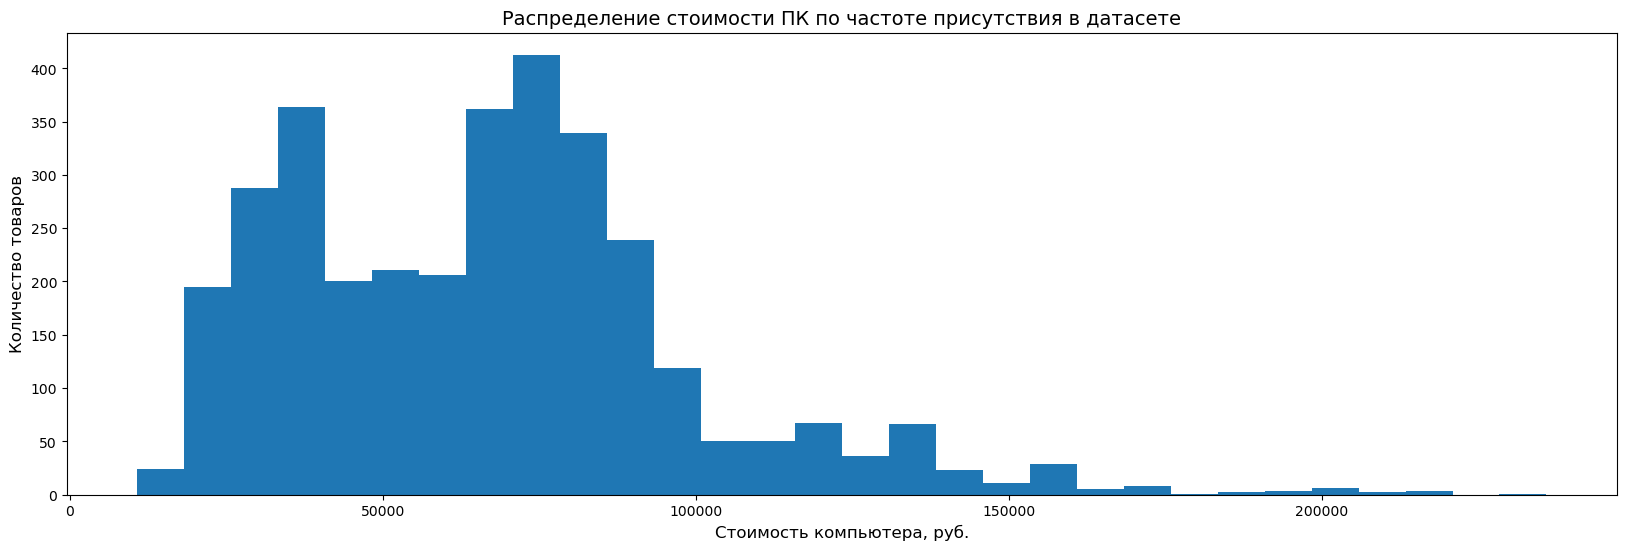

In [15]:
fig = plt.figure(figsize = (20, 6))

plt.hist(df_3['price'], bins=30)
plt.title("Распределение стоимости ПК по частоте присутствия в датасете", fontsize = 14)
plt.xlabel('Стоимость компьютера, руб.', fontsize = 12)
plt.ylabel('Количество товаров', fontsize = 12)
plt.xticks(fontsize = 10)
plt.show()

### Гипотеза о виде распределения

По графику мы увидели, что распределение цены на ПК не очень хорошо согласуется с нормальным законом распределения. 

Проверим гипотезу о нормальности данного распределения по критерию Шапира-Уилка.

> **Гипотеза Н0:** наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05.

In [16]:
stats.shapiro(df_3['price'])

ShapiroResult(statistic=0.9429711103439331, pvalue=5.060274969081995e-34)

Значение сильно p-value < 0,05, поэтому мы отклоняем Н0, т.е. данная выборка не принадлежит нормальной генеральной совокупности при уровне значимости 0,05.

### Результаты анализа числовых данных:

* Цена на персональные компьютеры (**'price_rur'**) не распределена нормально
* Средняя цена ПК составляет примерно 67 834 рублей
* Медианное значение - 66 825 рублей
* Наиболее харакетрные значения цены на ПК находятся в интервале от 40 040 до 84 150 рублей..

## Анализ взаимосвязи числовых и порядковых признаков

### Влияние на целевой показатель 'price'

In [17]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3323 entries, 0 to 3368
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3323 non-null   object 
 1   price                   3323 non-null   int64  
 2   sales                   3323 non-null   int64  
 3   seller_rating           3323 non-null   float64
 4   CPU                     3238 non-null   object 
 5   cores                   3311 non-null   float64
 6   RAM                     3323 non-null   object 
 7   size_of_RAM_GB          3323 non-null   int64  
 8   size_of_HDD_GB          1088 non-null   float64
 9   size_of_SSD_GB          3275 non-null   float64
 10  Видеопроцессор          3264 non-null   object 
 11  Операционная система    3323 non-null   object 
 12  Страна производства     3323 non-null   object 
 13  Гарантийный срок(мес.)  3323 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usa

#### Взаимосвязь 'price_rur' и 'sales'

Признак 'sales' является количественным, но дискретным, поэтому визуализируем его взаимосвязь с целевым показателем с помощью диаграммы рассеяния и размаха.

Также у показателя 'sales' 74% пропущенн (нулевых)ых значений, и чтобы провести взимосвязь этого показателя с ценой товара, нам нужно удалить эти наблюден.и.

In [18]:
df_sales = df_3.copy()
df_sales = df_sales.query('sales != 0')
df_sales.rename(columns={'price': 'price_rur'}, inplace=True)
df_sales.sales.value_counts()

sales
2      432
5      138
10      88
20      39
30      16
100     16
40      15
50       9
80       7
200      5
90       3
400      3
500      3
800      2
300      2
70       2
60       1
Name: count, dtype: int64

<Axes: xlabel='sales', ylabel='price_rur'>

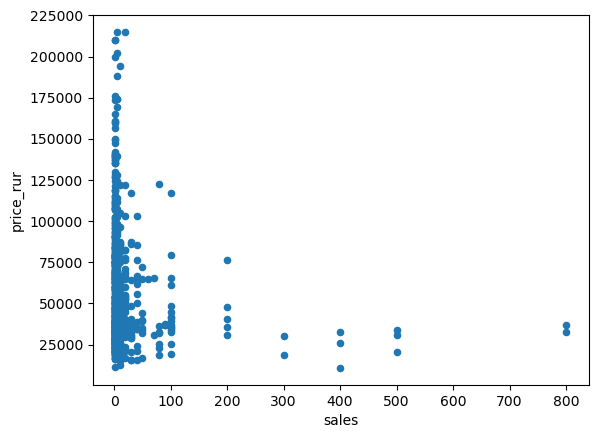

In [19]:
df_sales.plot("sales",'price_rur',kind="scatter")

C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sales', ylabel='price_rur'>

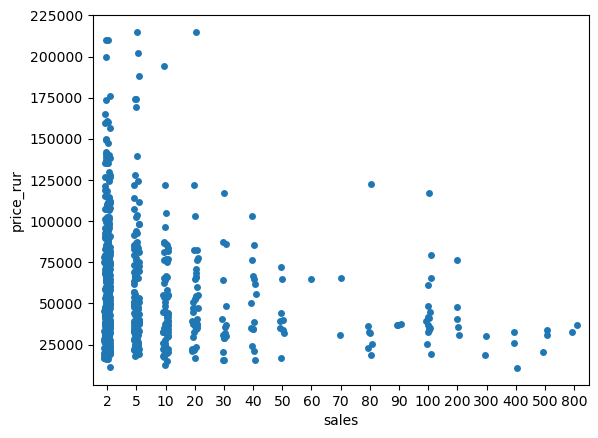

In [20]:
sns.stripplot(x='sales', y='price_rur', data=df_sales)

По графику видно, что большинство товаров было куплено от 2 до 20 раз. Также видно, что с увеличением количества продаж в среднем цена на товары падает, что говорит о вероятной обратной связи между признаками.

Проверим эту гипотезу ниже в блоке "Общий тест на взаимосвязь числовых и порядковых признаков".

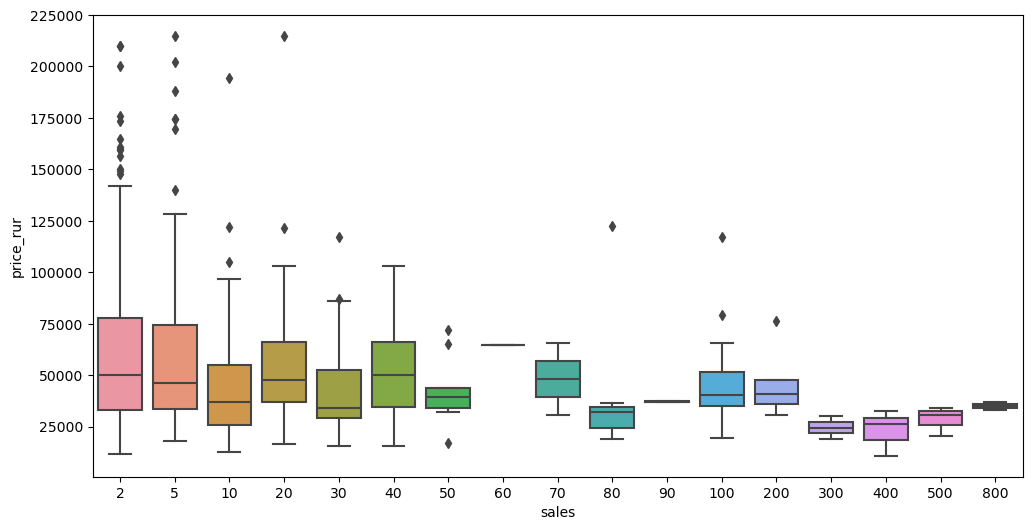

In [21]:
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x='sales', y='price_rur', data=df_sales)

А на графике "ящик с усами" явной тенденции к взаимосвязи между показателями не видно.

#### Взаимосвязь 'price_rur' и 'cores'

In [22]:
df_3['cores'].value_counts()

cores
6.0     1406
4.0      741
8.0      419
12.0     273
2.0      250
10.0     103
24.0      60
16.0      45
14.0       7
20.0       7
Name: count, dtype: int64

In [23]:
df_3.rename(columns={'price': 'price_rur'}, inplace=True)
groups = df_3.groupby('cores')
groups_mean_price = groups['price_rur'].mean()
groups_mean_price

cores
2.0      40681.032000
4.0      41744.962213
6.0      69063.942390
8.0      79334.921241
10.0    100493.349515
12.0    109298.025641
14.0    157061.571429
16.0    134621.177778
20.0     69382.857143
24.0     43417.200000
Name: price_rur, dtype: float64

Удалим пропущенные значения для построения графика и последующего расчета критерия.

In [24]:
df_cores = df_3.copy()
df_cores.dropna(subset='cores', inplace=True)
df_cores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3311 entries, 0 to 3368
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3311 non-null   object 
 1   price_rur               3311 non-null   int64  
 2   sales                   3311 non-null   int64  
 3   seller_rating           3311 non-null   float64
 4   CPU                     3228 non-null   object 
 5   cores                   3311 non-null   float64
 6   RAM                     3311 non-null   object 
 7   size_of_RAM_GB          3311 non-null   int64  
 8   size_of_HDD_GB          1085 non-null   float64
 9   size_of_SSD_GB          3266 non-null   float64
 10  Видеопроцессор          3261 non-null   object 
 11  Операционная система    3311 non-null   object 
 12  Страна производства     3311 non-null   object 
 13  Гарантийный срок(мес.)  3311 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usa

C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cores', ylabel='price_rur'>

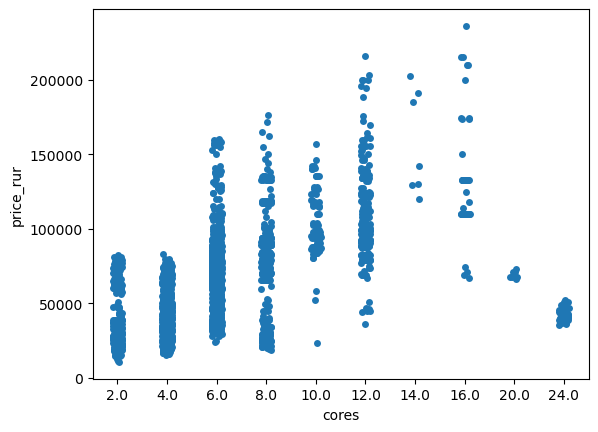

In [25]:
sns.stripplot(x='cores', y='price_rur', data=df_cores)

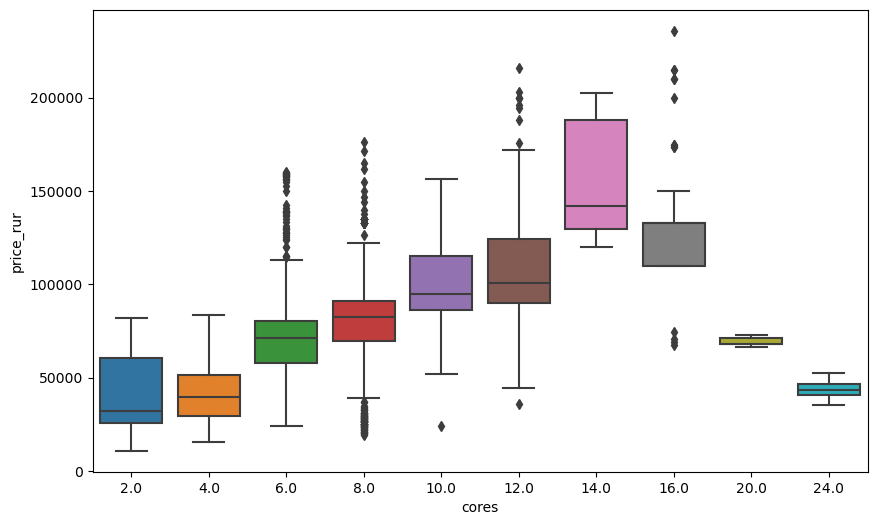

In [26]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='cores', y='price_rur', data=df_cores)

По обоим графикам видно увеличение стоимости ПК с увеличением количества ядер процессора до значения "14 ядер" и "16 ядер", а после этого значения средние показатели снижаются.

Это дает повод предположить прямую связь между показателями, которую мы проверим ниже в блоке "Общий тест на взаимосвязь числовых и порядковых признаков".

#### Взаимосвязь 'price_rur' и 'size_of_RAM_GB'

In [27]:
df_3['size_of_RAM_GB'].value_counts()

size_of_RAM_GB
16      1980
32       657
8        538
4        107
64        38
6          2
1000       1
Name: count, dtype: int64

In [28]:
groups = df_3.groupby('size_of_RAM_GB')
groups_size_RAM = groups['price_rur'].mean()
groups_size_RAM

size_of_RAM_GB
4       25246.401869
6       23602.500000
8       42561.940520
16      66581.320707
32      95179.899543
64      64096.078947
1000    85050.000000
Name: price_rur, dtype: float64

Удалим пропущенные значения для построения графика и последующего расчета критерия.

In [29]:
df_sizeRAM = df_3.copy()
df_sizeRAM.dropna(subset='size_of_RAM_GB', inplace=True)
df_sizeRAM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3323 entries, 0 to 3368
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3323 non-null   object 
 1   price_rur               3323 non-null   int64  
 2   sales                   3323 non-null   int64  
 3   seller_rating           3323 non-null   float64
 4   CPU                     3238 non-null   object 
 5   cores                   3311 non-null   float64
 6   RAM                     3323 non-null   object 
 7   size_of_RAM_GB          3323 non-null   int64  
 8   size_of_HDD_GB          1088 non-null   float64
 9   size_of_SSD_GB          3275 non-null   float64
 10  Видеопроцессор          3264 non-null   object 
 11  Операционная система    3323 non-null   object 
 12  Страна производства     3323 non-null   object 
 13  Гарантийный срок(мес.)  3323 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usa

C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='size_of_RAM_GB', ylabel='price_rur'>

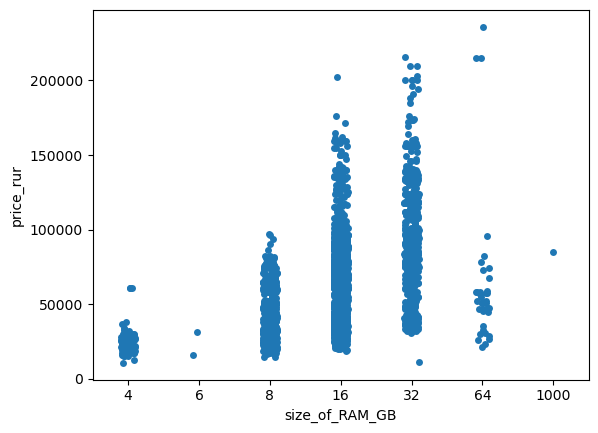

In [30]:
sns.stripplot(x='size_of_RAM_GB', y='price_rur', data=df_sizeRAM)

На графике хорошо видно, что чаще всего в датасете встречаются товары с объемами оперативной памяти от 8 до 32 Гб. Также видно, что с увеличением количества оперативной памяти растет и стоимость ПК, что говорит о возможном наличии прямой связи между показателями.

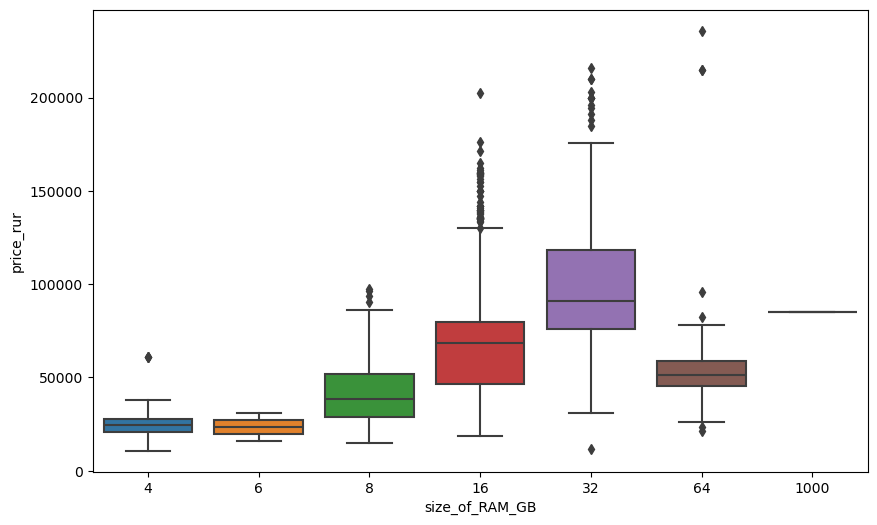

In [31]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='size_of_RAM_GB', y='price_rur', data=df_sizeRAM)

На графике "ящик с усами" также видно увеличение стоимости ПК с увеличением объема оперативной памяти до значения 32 Гб, а после этого значения средней цены на товары снижается.

Проверим гипотезу о наличии связи между признаками ниже, в блоке "Общий тест на взаимосвязь числовых и порядковых признаков".

#### Взаимосвязь 'price_rur' и 'size_of_HDD_GB'

In [32]:
df_3['size_of_HDD_GB'].unique()

array([  nan, 1000., 2000.,  500., 3000.,  250.])

In [33]:
groups = df_3.groupby('size_of_HDD_GB')
groups_size_HDD = groups['price_rur'].mean()
groups_size_HDD

size_of_HDD_GB
250.0      39520.000000
500.0      33241.596330
1000.0     77684.656811
2000.0    158128.964286
3000.0     77752.000000
Name: price_rur, dtype: float64

In [34]:
df_sizeHDD = df_3.copy()
df_sizeHDD.dropna(subset='size_of_HDD_GB', inplace=True)
df_sizeHDD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1088 entries, 26 to 3368
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   1088 non-null   object 
 1   price_rur               1088 non-null   int64  
 2   sales                   1088 non-null   int64  
 3   seller_rating           1088 non-null   float64
 4   CPU                     1086 non-null   object 
 5   cores                   1085 non-null   float64
 6   RAM                     1088 non-null   object 
 7   size_of_RAM_GB          1088 non-null   int64  
 8   size_of_HDD_GB          1088 non-null   float64
 9   size_of_SSD_GB          1047 non-null   float64
 10  Видеопроцессор          1080 non-null   object 
 11  Операционная система    1088 non-null   object 
 12  Страна производства     1088 non-null   object 
 13  Гарантийный срок(мес.)  1088 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory us

C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='size_of_HDD_GB', ylabel='price_rur'>

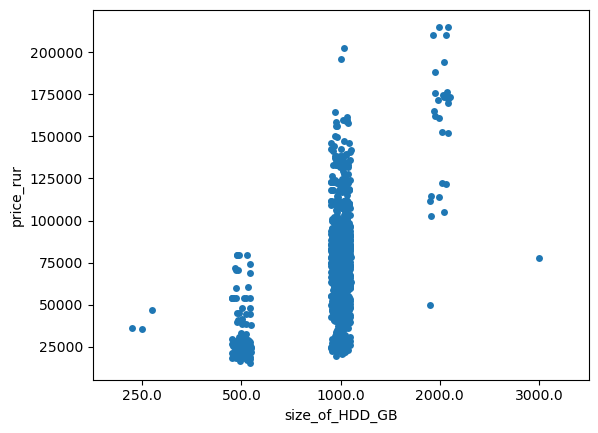

In [35]:
sns.stripplot(x='size_of_HDD_GB', y='price_rur', data=df_sizeHDD)

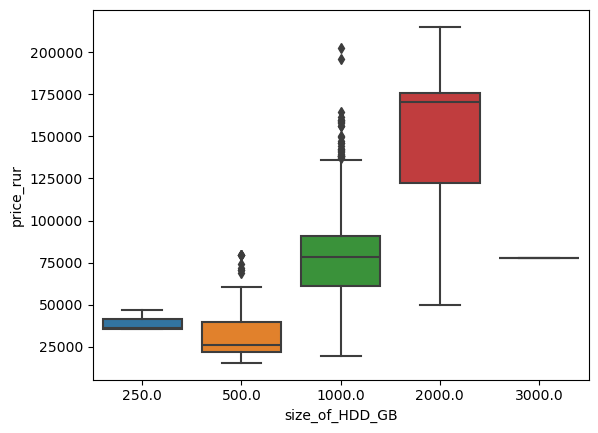

In [36]:
fig = sns.boxplot(x='size_of_HDD_GB', y='price_rur', data=df_sizeHDD)

По обоим графикам видно увеличение стоимости ПК с увеличением объема жесткого диска со значения 500 Гб до 2000 Гб.

Проверим гипотезу о наличии связи между показателями ниже.

#### Взаимосвязь 'price_rur' и 'size_of_SSD_GB'

In [37]:
df_3['size_of_SSD_GB'].unique()

array([  nan,  250.,  500., 1000.,  120.])

In [38]:
groups = df_3.groupby('size_of_SSD_GB')
groups_size_SSD = groups['price_rur'].mean()
groups_size_SSD

size_of_SSD_GB
120.0     35553.315508
250.0     49499.960998
500.0     67708.314194
1000.0    86831.721293
Name: price_rur, dtype: float64

In [39]:
df_sizeSSD = df_3.copy()
df_sizeSSD.dropna(subset='size_of_SSD_GB', inplace=True)

C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='size_of_SSD_GB', ylabel='price_rur'>

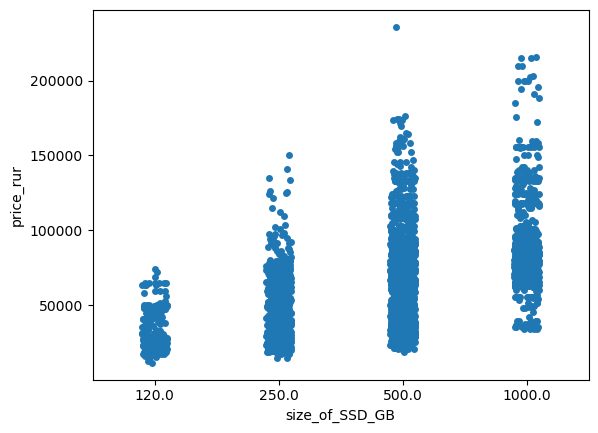

In [40]:
sns.stripplot(x='size_of_SSD_GB', y='price_rur', data=df_sizeSSD)

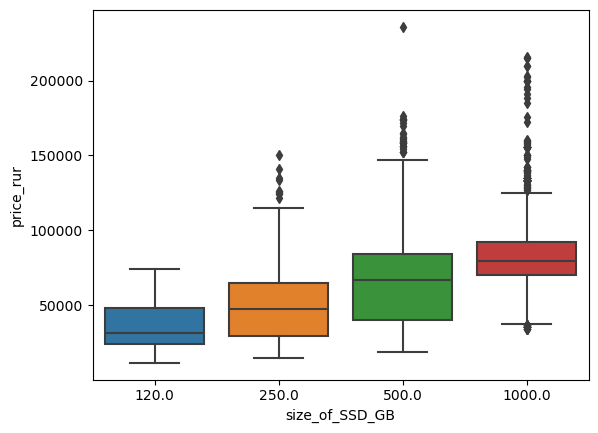

In [41]:
fig = sns.boxplot(x='size_of_SSD_GB', y='price_rur', data=df_sizeSSD)

По обоим графикам видно увеличение стоимости ПК с увеличением объема твердотельного накопителя. 

Проверим гипотезу о наличии связи между показателями ниже.

#### Взаимосвязь 'price_rur' и 'Гарантийный срок(мес.)'

In [42]:
df_3['Гарантийный срок(мес.)'].value_counts()

Гарантийный срок(мес.)
36    1261
0     1186
12     819
24      47
6        5
3        2
1        2
2        1
Name: count, dtype: int64

In [43]:
groups = df_3.groupby('Гарантийный срок(мес.)')
groups_guar = groups['price_rur'].mean()
groups_guar

Гарантийный срок(мес.)
0     79838.611298
1     27920.000000
2     50250.000000
3     14800.000000
6     33679.600000
12    54746.898657
24    50585.297872
36    63698.575734
Name: price_rur, dtype: float64

In [44]:
df_guar = df_3.copy()
df_guar.dropna(subset='Гарантийный срок(мес.)', inplace=True)
df_guar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3323 entries, 0 to 3368
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3323 non-null   object 
 1   price_rur               3323 non-null   int64  
 2   sales                   3323 non-null   int64  
 3   seller_rating           3323 non-null   float64
 4   CPU                     3238 non-null   object 
 5   cores                   3311 non-null   float64
 6   RAM                     3323 non-null   object 
 7   size_of_RAM_GB          3323 non-null   int64  
 8   size_of_HDD_GB          1088 non-null   float64
 9   size_of_SSD_GB          3275 non-null   float64
 10  Видеопроцессор          3264 non-null   object 
 11  Операционная система    3323 non-null   object 
 12  Страна производства     3323 non-null   object 
 13  Гарантийный срок(мес.)  3323 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usa

C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Гарантийный срок(мес.)', ylabel='price_rur'>

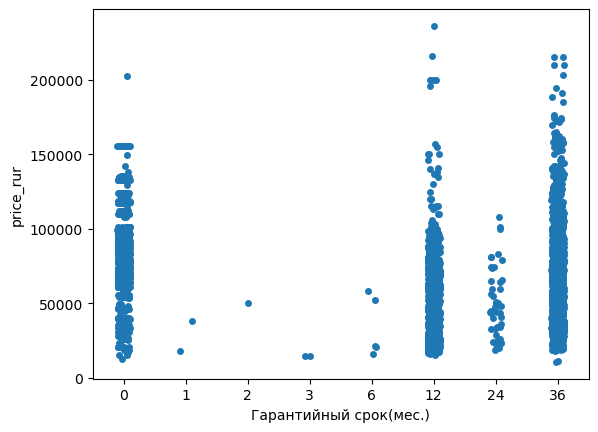

In [45]:
sns.stripplot(x='Гарантийный срок(мес.)', y='price_rur', data=df_guar)

На графике хорошо видно, что большинство товаров имеют гарантийный срок от 12 до 36 месяцев.
И есть небольшое увеличение стоимости ПК с увеличением гарантийного срока между 12 и 36 месяцами.

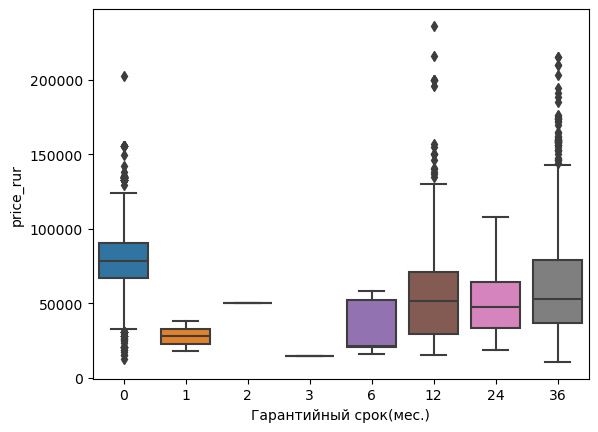

In [46]:
fig = sns.boxplot(x='Гарантийный срок(мес.)', y='price_rur', data=df_guar)

По графику видно Небольшое увеличение стоимости ПК с увеличением гарантийного срока.

Проверим гипотезу о связи между показателями ниже.

#### Взаимосвязь 'price_rur' и 'seller_rating'

In [47]:
df_3['seller_rating'].unique()

array([0. , 4.7, 4.3, 4.1, 4.2, 4.4, 5. , 4.5, 3.7, 4.6, 1.5, 3.5, 4.9,
       3.3, 4.8, 4. , 3. , 3.9])

Удалим значения (отфильтруем) рейтинга, равные 0. По сути это тоже пропущенные значения, но имеющие метку "0.0".

In [48]:
filter_rating = df_3['seller_rating']>2.0
df_rating = df_3[filter_rating]
df_rating['seller_rating'].unique()

array([4.7, 4.3, 4.1, 4.2, 4.4, 5. , 4.5, 3.7, 4.6, 3.5, 4.9, 3.3, 4.8,
       4. , 3. , 3.9])

C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='seller_rating', ylabel='price_rur'>

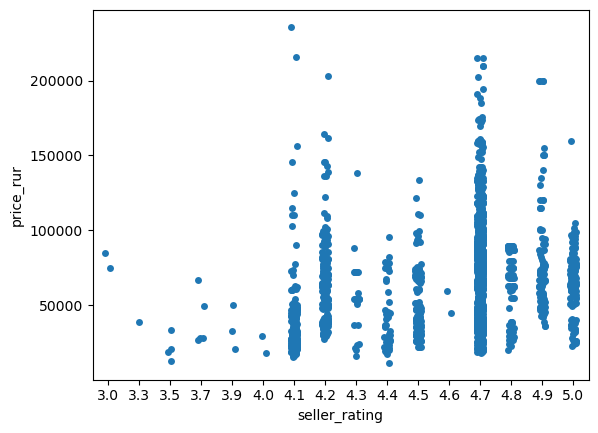

In [49]:
sns.stripplot(x='seller_rating', y='price_rur', data=df_rating)

На графике хорошо видно, что большинство товаров из дтасета представлены у продавцов с рейтингом от 4.1 до 5.0. Также видна тенденция к увеличению стоимости товаров с увеличением рейтинга продавца в интервале от 4.1 до 4.7.

Проверим гипотезу о наличии прямой связи между показателями ниже.

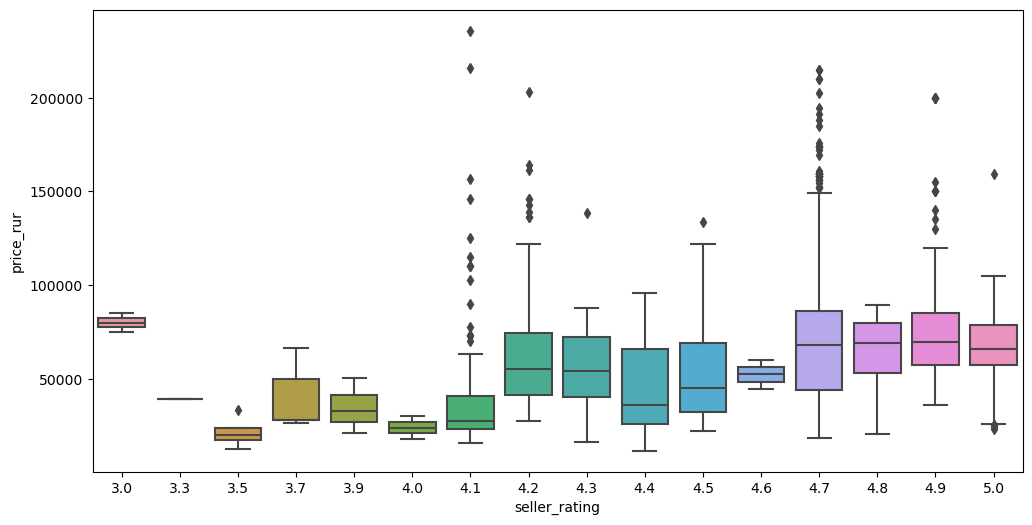

In [50]:
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x='seller_rating', y='price_rur', data=df_rating)

По графику "ящик с усами" сложно уловить какую-то взаимосвязь, видно, что средние показатели то растут, то падают.

#### Общий тест на взаимосвязь числовых и порядковых признаков

Чтобы оценить степень тесноты статистической связи между количественными показателями, мы можем примнить Парный коэффициент корреляции Пирсона. Но у нас есть один показатель порядковый, поэтому в общей таблице применяем ранговый коэффициент Спирмена.

> **Гипотеза Н0: связь между признаками отсутствует или она равна 0.**

In [51]:
df_3.head()

,title,price_rur,sales,seller_rating,CPU,cores,RAM,size_of_RAM_GB,size_of_HDD_GB,size_of_SSD_GB,Видеопроцессор,Операционная система,Страна производства,Гарантийный срок(мес.)
0,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400,0.0,Intel other,2.0,DDR 3,4,NaN,NaN,intel,отсутствует,Россия,36
1,Системный блок,32900,0,0.0,Intel Core i5,NaN,не заполнено,16,NaN,250.0,NaN,отсутствует,Китай,0
2,Компьютер Hp Prodesk 400 g6 mt,35720,0,0.0,NaN,NaN,не заполнено,16,NaN,500.0,NaN,отсутствует,не указано,0
3,Офисный Компьютер Robotcomp Казначей V1,39237,10,4.7,Intel Core i5,6.0,DDR 4,8,NaN,500.0,intel,windows trial,Россия,36
4,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200,4.7,Intel Core i5,6.0,DDR 4,16,NaN,1000.0,nvidia geforce gtx 1660,windows trial,Россия,36


In [52]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3323 entries, 0 to 3368
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3323 non-null   object 
 1   price_rur               3323 non-null   int64  
 2   sales                   3323 non-null   int64  
 3   seller_rating           3323 non-null   float64
 4   CPU                     3238 non-null   object 
 5   cores                   3311 non-null   float64
 6   RAM                     3323 non-null   object 
 7   size_of_RAM_GB          3323 non-null   int64  
 8   size_of_HDD_GB          1088 non-null   float64
 9   size_of_SSD_GB          3275 non-null   float64
 10  Видеопроцессор          3264 non-null   object 
 11  Операционная система    3323 non-null   object 
 12  Страна производства     3323 non-null   object 
 13  Гарантийный срок(мес.)  3323 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usa

Строю матрицу корреляции с использованием коэффициента Спирмена.

In [53]:
df_3[['price_rur','sales','cores','size_of_RAM_GB','size_of_HDD_GB','size_of_SSD_GB','seller_rating', 'Гарантийный срок(мес.)']].corr(method='spearman')

,price_rur,sales,cores,size_of_RAM_GB,size_of_HDD_GB,size_of_SSD_GB,seller_rating,Гарантийный срок(мес.)
price_rur,1.000000,-0.244653,0.625433,0.545572,0.491589,0.506246,0.045115,-0.287059
sales,-0.244653,1.000000,-0.158782,-0.061460,-0.125574,-0.116036,0.129801,0.362508
cores,0.625433,-0.158782,1.000000,0.447647,0.276904,0.404109,-0.207734,-0.339545
size_of_RAM_GB,0.545572,-0.061460,0.447647,1.000000,0.411380,0.393747,0.167030,-0.116409
size_of_HDD_GB,0.491589,-0.125574,0.276904,0.411380,1.000000,0.292727,0.318556,0.022402
size_of_SSD_GB,0.506246,-0.116036,0.404109,0.393747,0.292727,1.000000,-0.135306,-0.280584
seller_rating,0.045115,0.129801,-0.207734,0.167030,0.318556,-0.135306,1.000000,0.280643
Гарантийный срок(мес.),-0.287059,0.362508,-0.339545,-0.116409,0.022402,-0.280584,0.280643,1.000000


Оценим связь между целевым показателем 'price_rur' со всеми представленными количественными и порядковыми факторами.

Цена товара с продажами имеет очень слабую обратную связь.
Достаточно тесная связь получилась согласно по Спирмену между
- ценой товара и количеством ядер процессора,
- ценой товара и размером оперативной памяти
- ценой товара и размером жесткого диска
- ценой товара и объемом твердотельного накопителя

Цена товара с рейтингом продавца имеет самую низкую связь.

Теперь проверим гипотезу о значимости найденных корреляционных коэф-тов.

> **Гипотеза H0**: теоритическое значение оцениваемого корреляционного коэффициента Пирсона или Спирмена = 0.

In [54]:
scipy.stats.pearsonr(df_sales['price_rur'], df_sales['sales'])

PearsonRResult(statistic=-0.11406330474790144, pvalue=0.0014081425598326505)

pvalue < 0.05, это говорит о том, что гипотеза о незначимости отклоняется. То есть **значение связи между ценой товара и продажами является статистически значимой**, хотя сама связь достаточно слабая.

In [55]:
scipy.stats.pearsonr(df_cores['price_rur'], df_cores['cores'])

PearsonRResult(statistic=0.43360041074613964, pvalue=7.188047377022598e-152)

pvalue значительно < 0.05, это говорит о том, что гипотеза о незначимости очень надежно отклоняется. То есть **значение связи между ценой товара и количеством ядер процессора является статистически значимой**.

In [56]:
scipy.stats.pearsonr(df_sizeRAM['price_rur'], df_sizeRAM['size_of_RAM_GB'])

PearsonRResult(statistic=0.2283674491592203, pvalue=1.4293466444376422e-40)

pvalue значительно < 0.05, это говорит о том, что гипотеза о незначимости очень надежно отклоняется. То есть **связь между ценой товара и обьемом оперативной памяти является статистически значимой.**

In [57]:
scipy.stats.pearsonr(df_sizeHDD['price_rur'], df_sizeHDD['size_of_HDD_GB'])

PearsonRResult(statistic=0.5486679846525475, pvalue=1.5221812063163436e-86)

pvalue значительно < 0.05, это говорит о том, что гипотеза о незначимости очень надежно отклоняется. То есть **связь между ценой товара и обьемом жесткого диска является статистически значимой.**

In [58]:
scipy.stats.pearsonr(df_sizeSSD['price_rur'], df_sizeSSD['size_of_SSD_GB'])

PearsonRResult(statistic=0.459110875676486, pvalue=1.754546813820398e-170)

pvalue значительно < 0.05, это говорит о том, что гипотеза о незначимости очень надежно отклоняется. То есть **связь между ценой товара и обьемом твердотельного накопителя является статистически значимой.**

In [59]:
scipy.stats.pearsonr(df_guar['price_rur'], df_guar['Гарантийный срок(мес.)'])

PearsonRResult(statistic=-0.17368021676222464, pvalue=6.446713442111286e-24)

pvalue < 0.05, это говорит о том, что гипотеза о незначимости отклоняется. То есть **связь между ценой товара и гарантийным сроком является статистически значимой.**

In [60]:
scipy.stats.spearmanr(df_rating['price_rur'], df_rating['seller_rating'])

SignificanceResult(statistic=0.3449649665741843, pvalue=1.532280898907714e-74)

pvalue < 0.05. Следовательно выносим решение о том, что данная связь также является статистически значимой.
 слабаяз

Также по матрице корреляции можно рассмотреть корреляцию между остальными признаками. Сильной корреляции между признаками не наблюдается, а вот **средняя корреляция замечена между:**
* 'cores' и 'size_of_RAM_GB'
* 'cores' и 'size_of_SSD_GB'
* 'size_of_RAM_GB' и 'size_of_HDD_GB'
Проверим гипотезу о значимости этих связей.
> 
Гипотеза H0: теоритическое значение оцениваемого корреляционного коэффициента Пирсона или Спирмена = 0. прямая.


In [75]:
scipy.stats.pearsonr(df_cores['cores'], df_cores['size_of_RAM_GB'])

PearsonRResult(statistic=0.378306476144693, pvalue=7.644516899337896e-28)

pvalue < 0.05, это говорит о том, что гипотеза о незначимости отклоняется. То есть **связь между количеством ядер и оперативной пямятью является статистически значимой.**

In [81]:
df_cores_SSD = df_cores.dropna(subset='size_of_SSD_GB', inplace=True)

In [82]:
scipy.stats.pearsonr(df_cores['cores'], df_cores['size_of_SSD_GB'])

PearsonRResult(statistic=0.3438643169066382, pvalue=2.865409935407454e-22)

pvalue < 0.05, это говорит о том, что гипотеза о незначимости отклоняется. То есть **связь между количеством ядер и размером твердотельного накопителя является статистически значимой.**

In [112]:
df_ssd_hdd = df_3.copy()
df_ssd_hdd.dropna(subset='size_of_SSD_GB', inplace=True)
df_ssd_hdd.dropna(subset='size_of_HDD_GB', inplace=True)

In [114]:
scipy.stats.pearsonr(df_ssd_hdd['size_of_SSD_GB'], df_ssd_hdd['size_of_HDD_GB'])

PearsonRResult(statistic=0.3031834687553707, pvalue=1.0625781102913417e-23)

pvalue < 0.05, это говорит о том, что гипотеза о незначимости отклоняется. То есть **связь между размером твердотельного накопителя и размером жесткого диска является статистически значимой.**


#### Результаты:

в результате исследования выяснилось, что на цену товара влияют следующие признаки:
* 'sales' - количество продаж. Коэффициент корреляции -0.24, связь обратная, очень слабая
* 'cores' - количество ядер процессора. Коэффициент корреляции 0.62, связь прямая, умеренная
* 'size_of_RAM_GB' - обьем оперативной памяти. Коэффициент корреляции 0.55, связь прямая, умеренная
* 'size_of_HDD_GB' - обьем жесткого диска. Коэффициент корреляции 0.49, связь прямая, умеренная
* 'size_of_SSD_GB' - обьем жесткого диска. Коэффициент корреляции 0.5, связь прямая, умеренная
* 'seller_rating' - рейтинг продавца. Коэффициент корреляции 0.04, связь прямая, совсем слабая
* 'Гарантийный срок(мес.)', коэффициент корреляции -0.29, связь обратная, очень слабая

также обнаружена статистически значимая свзяь умеренной силы между следующими показателями:
* 'cores' и 'size_of_RAM_GB'
* 'cores' и 'size_of_SSD_GB'
* 'size_of_RAM_GB' и 'size_of_HDD_GB' прямая

Это информация может быть полезная при построеннии модели регрессии.

In [62]:
df_sales['cores'].unique()

array([ 2.,  6., 10.,  4., 12., 16.,  8., nan, 14., 24.])

In [63]:
df_cores = df_sales.copy()
df_cores.dropna(subset='cores', inplace=True)
df_cores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 2997
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   777 non-null    object 
 1   price_rur               777 non-null    int64  
 2   sales                   777 non-null    int64  
 3   seller_rating           777 non-null    float64
 4   CPU                     770 non-null    object 
 5   cores                   777 non-null    float64
 6   RAM                     777 non-null    object 
 7   size_of_RAM_GB          777 non-null    int64  
 8   size_of_HDD_GB          212 non-null    float64
 9   size_of_SSD_GB          751 non-null    float64
 10  Видеопроцессор          757 non-null    object 
 11  Операционная система    777 non-null    object 
 12  Страна производства     777 non-null    object 
 13  Гарантийный срок(мес.)  777 non-null    int64  
dtypes: float64(4), int64(4), object(6)
memory usag

C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cores', ylabel='sales'>

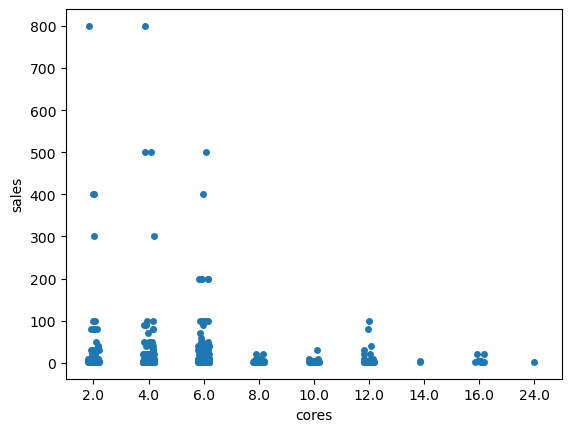

In [64]:
sns.stripplot(x='cores', y='sales', data=df_cores)

На графике видны значительные выбросы. Для визуального анализа стоит удалить эти значения из датасета.

In [65]:
df_cores.loc[df_cores['sales'] > 120]

,title,price_rur,sales,seller_rating,CPU,cores,RAM,size_of_RAM_GB,size_of_HDD_GB,size_of_SSD_GB,Видеопроцессор,Операционная система,Страна производства,Гарантийный срок(мес.)
0,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400,0.0,Intel other,2.0,DDR 3,4,NaN,NaN,intel,отсутствует,Россия,36
4,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200,4.7,Intel Core i5,6.0,DDR 4,16,NaN,1000.0,nvidia geforce gtx 1660,windows trial,Россия,36
24,Игровой Компьютер Robotcomp Аллигатор V2,32617,400,4.7,AMD Ryzen 5,6.0,DDR 4,16,NaN,500.0,amd radeon vega 7,windows 10,Россия,36
25,Игровой Компьютер Robotcomp Аллигатор V3,34017,500,4.7,AMD Ryzen 5,6.0,DDR 4,16,NaN,500.0,amd radeon vega 7,windows 10,Россия,36
26,Игровой Компьютер Robotcomp Аллигатор 3.0 V1,40694,200,4.7,AMD Ryzen 5,6.0,DDR 4,32,1000.0,500.0,amd radeon vega 7,windows trial,Россия,36
28,Игровой Компьютер Robotcomp Аллигатор 3.0 V3,47827,200,4.7,AMD Ryzen 5,6.0,DDR 4,32,1000.0,500.0,amd radeon vega 7,windows 10,Россия,36
66,Игровой Компьютер Robotcomp Старт V1,30760,500,4.7,Intel Core i3,4.0,DDR 4,8,NaN,500.0,nvidia geforce gt 1030,windows trial,Россия,36
81,Компьютер Raskat (Intel Pentium G6400/4Gb/120G...,36990,800,0.0,Intel other,2.0,DDR 4,4,NaN,120.0,intel,отсутствует,Россия,36
311,Игровой компьютер Roo24 x4 950 GT1030V1,29992,300,4.7,AMD other,4.0,DDR 4,8,NaN,500.0,nvidia geforce gt 1030,windows 10,Россия,36
325,Настольный Компьютер Robotcomp Orion V1,18957,300,4.7,AMD other,2.0,DDR 4,8,NaN,250.0,amd,windows trial,Россия,36


In [66]:
df_cores = df_cores.drop(index=[0,4,24,25,26,28,63,78,308,322,425,463,684,1203,1224])

KeyError: '[308, 425, 684] not found in axis'

In [ ]:
sns.stripplot(x='cores', y='sales', data=df_cores)

In [ ]:
fig = sns.boxplot(x='cores', y='sales', data=df_cores)

Ни по одному из графиков не замечено тенденции к увеличению или уменьшению продаж. Вероятнее всего связи между показателями нет.

Проверим эту гипотезу ниже, в блоке "Общий тест на взаимосвязь числовых и порядковых признаков".

In [63]:
df_sales['size_of_RAM_GB'].unique()

array([ 4,  8, 16, 32,  6, 64], dtype=int64)

In [64]:
df_sizeRAM = df_sales.copy()
df_sizeRAM.dropna(subset='size_of_RAM_GB', inplace=True)
df_sizeRAM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 2964
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   781 non-null    object 
 1   price_rur               781 non-null    int64  
 2   sales                   781 non-null    float64
 3   seller_rating           731 non-null    float64
 4   CPU                     773 non-null    object 
 5   cores                   777 non-null    float64
 6   RAM                     781 non-null    object 
 7   size_of_RAM_GB          781 non-null    int64  
 8   size_of_HDD_GB          212 non-null    float64
 9   size_of_SSD_GB          755 non-null    float64
 10  Видеопроцессор          781 non-null    object 
 11  Операционная система    781 non-null    int64  
 12  Страна производства     687 non-null    float64
 13  Гарантийный срок(мес.)  718 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usag

C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='size_of_RAM_GB', ylabel='sales'>

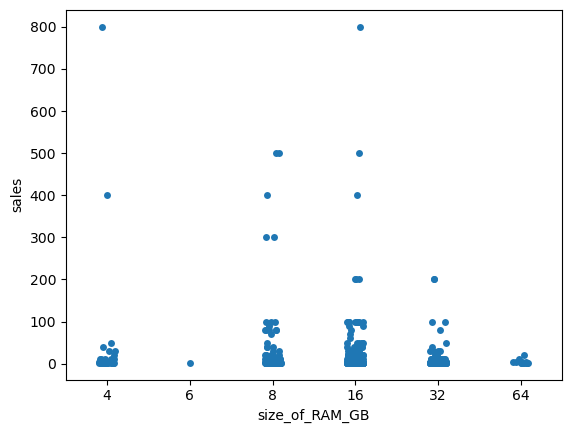

In [65]:
sns.stripplot(x='size_of_RAM_GB', y='sales', data=df_sizeRAM)

Здесь также видны выбросы. Думаю, стоит удалить выбросы для всего датасета df_sales.

In [66]:
df_sizeRAM.loc[df_sizeRAM['sales'] > 150]

,title,price_rur,sales,seller_rating,CPU,cores,RAM,size_of_RAM_GB,size_of_HDD_GB,size_of_SSD_GB,Видеопроцессор,Операционная система,Страна производства,Гарантийный срок(мес.)
0,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400.0,NaN,Intel Celeron,2.0,0,4,NaN,NaN,Intel HD Graphics,3,0.0,36.0
4,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200.0,4.7,Intel Core i5,6.0,1,16,NaN,1000.0,NVIDIA GeForce GTX 1660,2,0.0,36.0
24,Игровой Компьютер Robotcomp Аллигатор V2,32617,400.0,4.7,AMD Ryzen 5,6.0,1,16,NaN,500.0,AMD Radeon Vega 7,0,0.0,36.0
25,Игровой Компьютер Robotcomp Аллигатор V3,34017,500.0,4.7,AMD Ryzen 5,6.0,1,16,NaN,500.0,AMD Radeon Vega 7,0,0.0,36.0
26,Игровой Компьютер Robotcomp Аллигатор 3.0 V1,40694,200.0,4.7,AMD Ryzen 5,6.0,1,32,1000.0,500.0,AMD Radeon Vega 7,2,0.0,36.0
28,Игровой Компьютер Robotcomp Аллигатор 3.0 V3,47827,200.0,4.7,AMD Ryzen 5,6.0,1,32,1000.0,500.0,AMD Radeon Vega 7,0,0.0,36.0
63,Игровой Компьютер Robotcomp Старт V1,30760,500.0,4.7,Intel Core i3,4.0,1,8,NaN,500.0,NVIDIA GeForce GT 1030,2,0.0,36.0
78,Компьютер Raskat (Intel Pentium G6400/4Gb/120G...,36990,800.0,NaN,Intel Pentium,2.0,1,4,NaN,120.0,Intel HD Graphics 610,3,0.0,36.0
308,Игровой компьютер Roo24 x4 950 GT1030V1,29992,300.0,4.7,AMD Athlon,4.0,1,8,NaN,500.0,NVIDIA GeForce GT 1030,0,0.0,36.0
322,Настольный Компьютер Robotcomp Orion V1,18957,300.0,4.7,AMD A6,2.0,1,8,NaN,250.0,AMD Radeon R5,2,0.0,36.0


In [67]:
df_sizeRAM = df_sizeRAM.drop(index=[0,4,24,25,26,28,63,78,308,322,425,463,684,1203,1224])

C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='size_of_RAM_GB', ylabel='sales'>

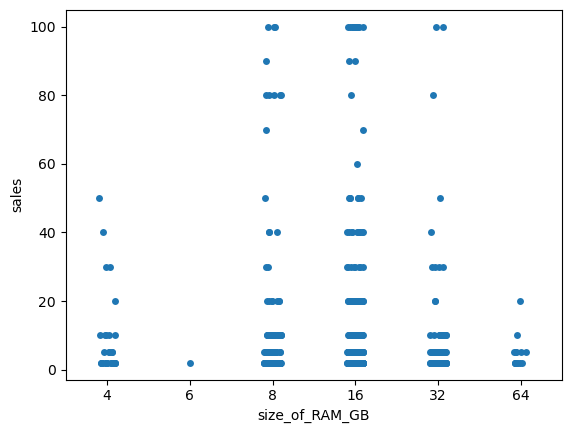

In [68]:
sns.stripplot(x='size_of_RAM_GB', y='sales', data=df_sizeRAM)

По графику без выбросов видно, что связь признаков маловероятна. Проверим это ниже в блоке "Общий тест на взаимосвязь числовых и порядковых признаков".

Также попробуем построить другие графики.

plt.plot(df_sizeRAM['size_of_RAM_GB'], df_sizeRAM['sales'], 'o', alpha=0.05)
plt.xlabel('Объем оперативной памяти в Гб')
plt.ylabel('Количество продаж ПК')

На этом графике заметна слабая тенденция к увеличению количества продаж с ростом объема оперативной памяти.

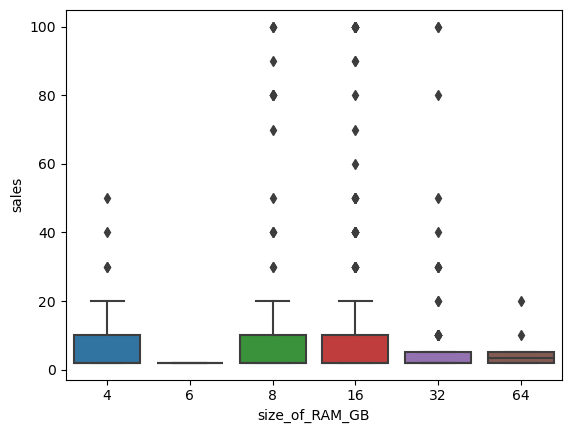

In [69]:
fig = sns.boxplot(x='size_of_RAM_GB', y='sales', data=df_sizeRAM)

График "ящик с усами" также не показывает взаимосвязи между показателями.

In [70]:
df_sales['size_of_HDD_GB'].unique()

array([  nan, 1000., 2000.,  500.,  250.])

In [71]:
df_sizeHDD = df_sales.copy()
df_sizeHDD.dropna(subset='size_of_HDD_GB', inplace=True)

Text(0, 0.5, 'Количество продаж ПК')

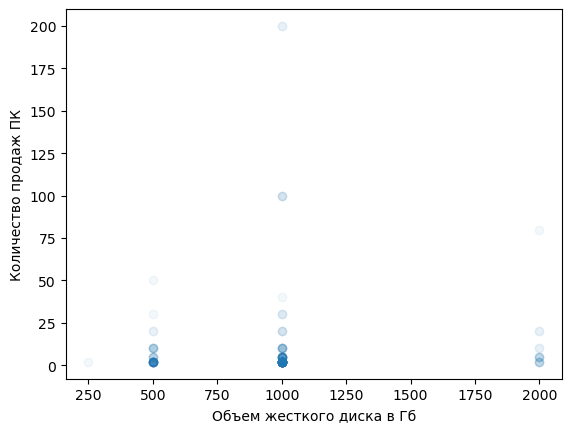

In [72]:
plt.plot(df_sizeHDD['size_of_HDD_GB'], df_sizeHDD['sales'], 'o', alpha=0.05)
plt.xlabel('Объем жесткого диска в Гб')
plt.ylabel('Количество продаж ПК')

(-0.5, 3.5, 0.0, 40.0)

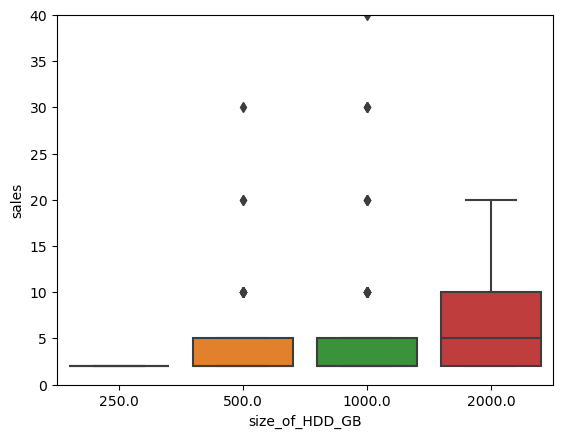

In [73]:
fig = sns.boxplot(x='size_of_HDD_GB', y='sales', data=df_sizeHDD)
plt.axis(ymin=0, ymax=40)

По графикам явной взаимосвязи также не видно.

Гипотезу об отсутствии связи между показателями проверим ниже.

In [74]:
df_sales['size_of_SSD_GB'].unique()

array([  nan,  500., 1000.,  250.,  120.])

In [ ]:
df_sizeSSD

Text(0, 0.5, 'Количество продаж ПК')

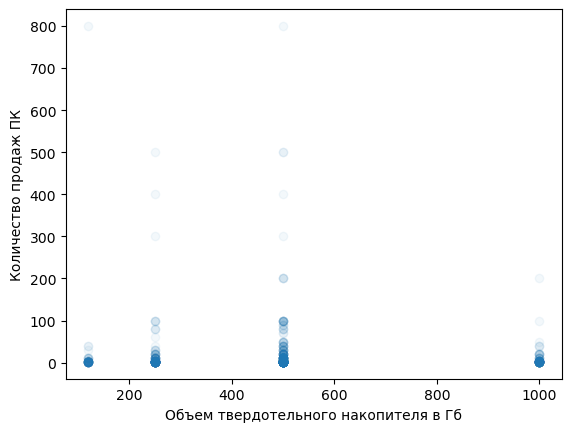

In [148]:
plt.plot(df_sizeSSD['size_of_SSD_GB'], df_sizeSSD['sales'], 'o', alpha=0.05)
plt.xlabel('Объем твердотельного накопителя в Гб')
plt.ylabel('Количество продаж ПК')

По графику просматривается небольшое увеличение количества продаж с увеличением объема твердотельного накопителя. Проверим эту гипотезу ниже.

(-0.5, 3.5, 0.0, 100.0)

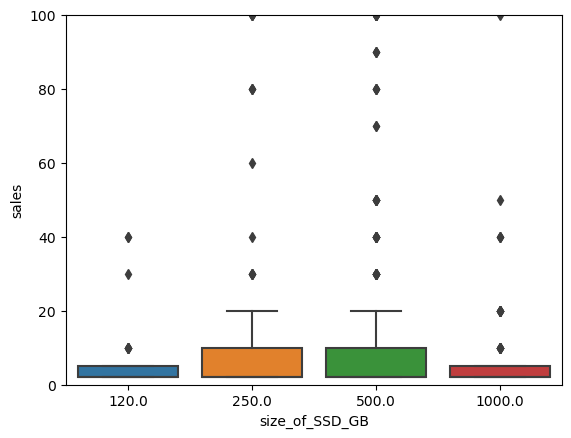

In [77]:
fig = sns.boxplot(x='size_of_SSD_GB', y='sales', data=df_sizeSSD)
plt.axis(ymin=0, ymax=100)

По графику "ящик с усами" видно сначала увеличение количества продаж, а затем уменьшение.

In [78]:
df_sales['Гарантийный срок(мес.)'].unique()

array([36.,  6., 24., 12., nan,  3.])

In [79]:
df_guar = df_sales.copy()
df_guar.dropna(subset='Гарантийный срок(мес.)', inplace=True)
df_guar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 2964
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   718 non-null    object 
 1   price_rur               718 non-null    int64  
 2   sales                   718 non-null    float64
 3   seller_rating           680 non-null    float64
 4   CPU                     714 non-null    object 
 5   cores                   715 non-null    float64
 6   RAM                     718 non-null    object 
 7   size_of_RAM_GB          718 non-null    int64  
 8   size_of_HDD_GB          176 non-null    float64
 9   size_of_SSD_GB          693 non-null    float64
 10  Видеопроцессор          718 non-null    object 
 11  Операционная система    718 non-null    int64  
 12  Страна производства     665 non-null    float64
 13  Гарантийный срок(мес.)  718 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usag

Text(0, 0.5, 'Количество продаж ПК')

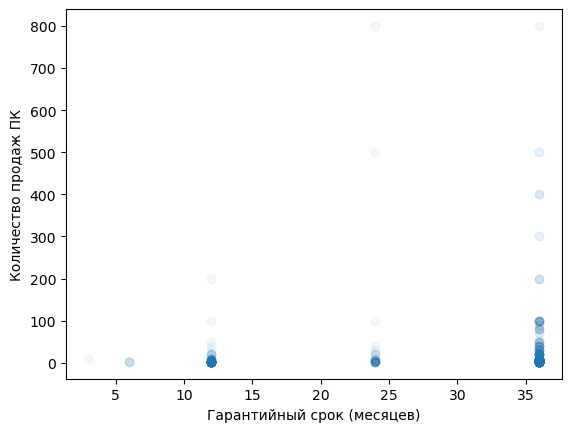

In [80]:
plt.plot(df_guar['Гарантийный срок(мес.)'], df_guar['sales'], 'o', alpha=0.05)
plt.xlabel('Гарантийный срок (месяцев)')
plt.ylabel('Количество продаж ПК')

По графику видно небольшое увеличение показателей продаж с увеличением гарантийного срока. Проверим гипотезу о наличии связи между показателями ниже.

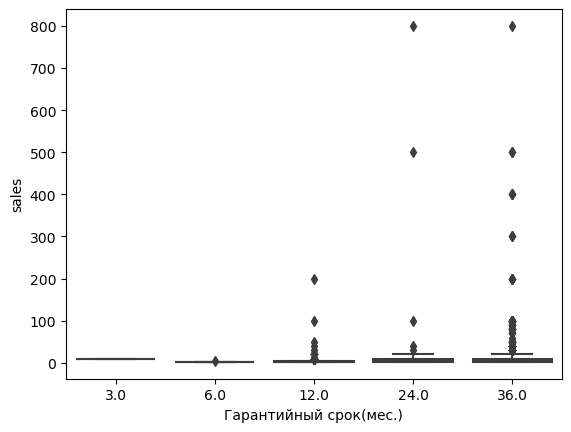

In [81]:
fig = sns.boxplot(x='Гарантийный срок(мес.)', y='sales', data=df_guar)
#plt.axis(ymin=0, ymax=100)

По графику "ящик с усами" мало что можно сказать.

In [82]:
df_sales['seller_rating'].unique()

array([nan, 4.7, 4.3, 4.2, 4.4, 4.5, 3.7, 5. , 4.6, 1.5, 4.1, 3.5, 4.9,
       4.8, 0. , 3. , 3.9])

Удалим значения (отфильтруем) рейтинга, равные 0. По сути это тоже пропущенные значения, но имеющие метку "0.0".

In [83]:
filter_rating = df_sales['seller_rating']>2.0
df_rating = df_sales[filter_rating]
df_rating['seller_rating'].unique()

array([4.7, 4.3, 4.2, 4.4, 4.5, 3.7, 5. , 4.6, 4.1, 3.5, 4.9, 4.8, 3. ,
       3.9])

Text(0, 0.5, 'Количество продаж ПК')

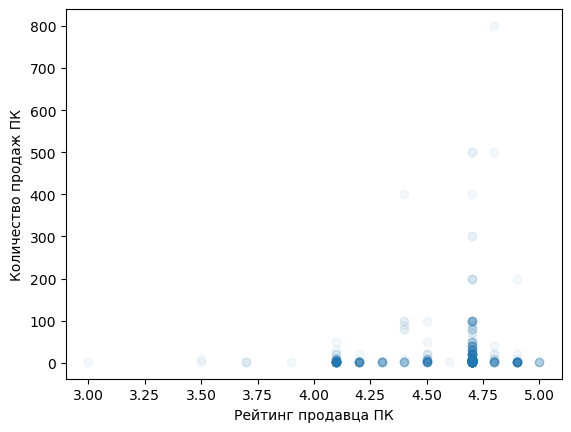

In [84]:
plt.plot(df_rating['seller_rating'], df_rating['sales'], 'o', alpha=0.05)
plt.xlabel('Рейтинг продавца ПК')
plt.ylabel('Количество продаж ПК')

По графику видна некоторая тенденция к увеличению количества продаж от показателей рейтинга 4.1 до 4.7.

Гипотезу о наличии связи проверим ниже.

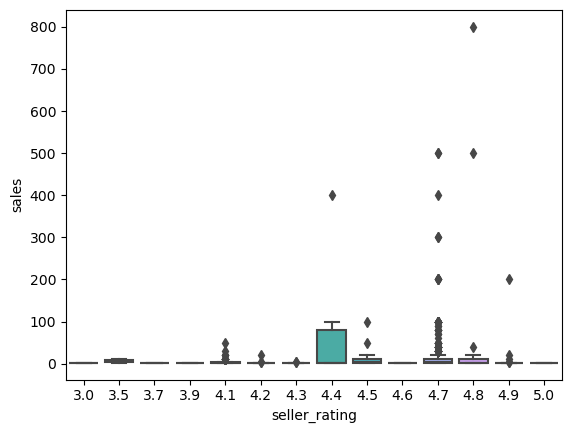

In [85]:
fig = sns.boxplot(x='seller_rating', y='sales', data=df_rating)

По графику "ящик с усами" взаимосвязи не видно.

In [86]:
df_sales[['sales','price_rur','cores','size_of_RAM_GB','size_of_HDD_GB','size_of_SSD_GB','seller_rating']].corr(method='spearman')

,sales,price_rur,cores,size_of_RAM_GB,size_of_HDD_GB,size_of_SSD_GB,seller_rating
sales,1.000000,-0.154038,-0.060000,-0.071353,0.074987,0.023480,0.064997
price_rur,-0.154038,1.000000,0.607334,0.563212,0.670717,0.535866,0.433937
cores,-0.060000,0.607334,1.000000,0.487915,0.489685,0.357220,0.026804
size_of_RAM_GB,-0.071353,0.563212,0.487915,1.000000,0.542337,0.456354,0.290332
size_of_HDD_GB,0.074987,0.670717,0.489685,0.542337,1.000000,0.257457,0.509223
size_of_SSD_GB,0.023480,0.535866,0.357220,0.456354,0.257457,1.000000,0.367767
seller_rating,0.064997,0.433937,0.026804,0.290332,0.509223,0.367767,1.000000


Оценим связь между целевым показателем 'sales' со всеми представленными количественными и порядковыми факторами.

Цена товара с продажами имеет слабую обратную связь.
Остальные показатели и количество продаж товаров имеют очень слабую связь.

Теперь проверим гипотезу о значимости найденных корреляционных коэф-тов.

> **Гипотеза H0**: теоритическое значение оцениваемого корреляционного коэффициента Пирсона или Спирмена = 0.

In [87]:
scipy.stats.pearsonr(df_cores['sales'], df_cores['cores'])

PearsonRResult(statistic=-0.06577078963885971, pvalue=0.06959397892042186)

pvalue > 0.05, это говорит о том, что гипотеза о незначимости принимается. То есть **связь между количеством продаж и количеством ядер процессора является статистически незначимой.**

In [88]:
scipy.stats.pearsonr(df_sizeRAM['sales'], df_sizeRAM['size_of_RAM_GB'])

PearsonRResult(statistic=-0.07586832743148328, pvalue=0.035783184619114124)

pvalue < 0.05, это говорит о том, что гипотеза о незначимости отклоняется. То есть **связь между количеством продаж и обьемом оперативной памяти является статистически значимой, хотя и очень слабой, связь обратная.**

In [89]:
scipy.stats.pearsonr(df_sizeHDD['sales'], df_sizeHDD['size_of_HDD_GB'])

PearsonRResult(statistic=0.059634701981549555, pvalue=0.38762637001850414)

pvalue > 0.05, это говорит о том, что гипотеза о незначимости принимается. То есть **связь между количеством продаж и обьемом жесткого диска является статистически незначимой.**

In [90]:
scipy.stats.pearsonr(df_sizeSSD['sales'], df_sizeSSD['size_of_SSD_GB'])

PearsonRResult(statistic=-0.04770665133676335, pvalue=0.190391476547485)

pvalue > 0.05, это говорит о том, что гипотеза о незначимости принимается. То есть **связь между количеством продаж и обьемом твердотельного накопителя является статистически незначимой.**

In [91]:
scipy.stats.pearsonr(df_guar['sales'], df_guar['Гарантийный срок(мес.)'])

PearsonRResult(statistic=0.0838824053486348, pvalue=0.024594106619390148)

pvalue < 0.05, это говорит о том, что гипотеза о незначимости отклоняется. То есть **связь между количеством продаж и гарантийным сроком является статистически значимой, хотя и слабой.**

In [92]:
scipy.stats.spearmanr(df_rating['sales'], df_rating['seller_rating'])

SignificanceResult(statistic=0.059599217812111846, pvalue=0.10859864796588514)

pvalue < 0.05. Следовательно выносим решение о том, что **данная связь также является статистически значимой.**

**Результат влияния количественных и порядковых признаков на целевой показатель "sales"**.

в результате исследования выяснилось, что на цену товара влияют следующие признаки:
* 'price_rur' - количество продаж. Коэффициент корреляции -0.11, связь обратная
* 'size_of_RAM_GB' - обьем оперативной памяти. Коэффициент корреляции -0.09, связь обратная.
* 'Гарантийный срок(мес.)', коэффициент корреляции 0.08, связь прямая.
* 'seller_rating' - рейтинг продавца. Коэффициент корреляции 0.09, связь прямая. прямая.

## Анализ взаимосвязи числовых и категориальных признаков
Для анализа числовых и категориальных признаков применяем критерий сравнения групп.

#### Взаимосвязь 'price_rur' и 'CPU'

Как уже известно, у признака 'CPU' 12 уникальных значений, причем некоторые из них встречаются редко.
Поэтому, считаю целесообразным провести анализ только по топ 7 самых часто встречающихся типов процессоров ('CPU').

In [115]:
df_3['CPU'].value_counts()

CPU
Intel Core i5    1091
Intel Core i7     680
Intel Core i3     490
AMD Ryzen 5       486
AMD other         177
Intel other       156
AMD Ryzen 7        71
AMD Ryzen 3        52
Intеl other        17
Intel Core i9      12
AMD Ryzen 9         4
AMD Ryzen 6         2
Name: count, dtype: int64

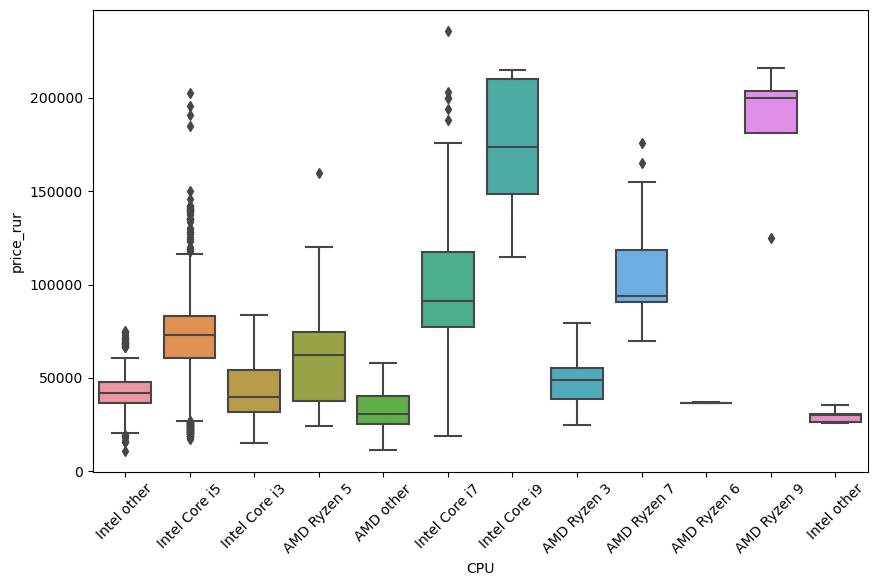

In [116]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45)
fig = sns.boxplot(x='CPU', y='price_rur', data=df_3)

В некоторых группах обнаружились выбросы. Но удалять выбросы, считаю, сейчас не стоит, так как на цену товара вероятно влияет не только этот показатель.

Проверим принадлежность нормальному закону распределения некотрые подвыборки цены:

In [117]:
df_i5 = df_3[df_3['CPU']=='Intel Core i5']
df_i7 = df_3[df_3['CPU']=='Intel Core i7']
df_i3 = df_3[df_3['CPU']=='Intel Core i3']
df_ryzen5 = df_3[df_3['CPU']=='AMD Ryzen 5']
df_amd = df_3[df_3['CPU']=='AMD other']
df_intel = df_3[df_3['CPU']=='Intel other']
df_ryzen7 = df_3[df_3['CPU']=='AMD Ryzen 7']
print(stats.shapiro(df_i5['price_rur']))
print(stats.shapiro(df_i7['price_rur']))
print(stats.shapiro(df_i3['price_rur']))
print(stats.shapiro(df_ryzen5['price_rur']))
print(stats.shapiro(df_amd['price_rur']))
print(stats.shapiro(df_intel['price_rur']))
print(stats.shapiro(df_ryzen7['price_rur']))

ShapiroResult(statistic=0.9330227375030518, pvalue=1.0470131499650147e-21)
ShapiroResult(statistic=0.9707309603691101, pvalue=2.0519690113740552e-10)
ShapiroResult(statistic=0.9623224139213562, pvalue=6.99863056397021e-10)
ShapiroResult(statistic=0.9280223846435547, pvalue=1.6051684314415463e-14)
ShapiroResult(statistic=0.9553685188293457, pvalue=2.1324090994312428e-05)
ShapiroResult(statistic=0.9447199106216431, pvalue=8.357696060556918e-06)
ShapiroResult(statistic=0.821164608001709, pvalue=7.800713319738861e-08)


Для всех значений pvalue < 0,05 (уровня значимости), значит гипотезу о нормальности закона рапределения этих признаков отклоняем.

Поэтому переходим к выбору непараметрического критерия сравнения групп.
Данные количественные, не принадлежат нормальной генеральной совокупности, групп > 2, данные в группах независимые, поэтому применяем критерий Краскала-Уиолиса:

In [118]:
df_cpu1=np.array(df_i5['price_rur'])
df_cpu2=np.array(df_i7['price_rur'])
df_cpu3=np.array(df_i3['price_rur'])
df_cpu4=np.array(df_ryzen5['price_rur'])
df_cpu5=np.array(df_amd['price_rur'])
df_cpu6=np.array(df_intel['price_rur'])
df_cpu7=np.array(df_ryzen7['price_rur'])

In [119]:
stats.mstats.kruskalwallis(df_cpu1,df_cpu2,df_cpu3,df_cpu4,df_cpu5,df_cpu6,df_cpu7)

KruskalResult(statistic=1292.278464182537, pvalue=5.0846780708236266e-276)

#### Выводы: 
pvalue<0.05, следовательно отклоняем H0 о равенстве средних показателей, и выносим решение о том, что различия являются статистически значимыми.

Отсюда можно сделать вывод о том, что **тип процессора будет влиять на цену ПК**.

#### Взаимосвязь 'price_rur' и 'RAM'

In [125]:
df_ram['RAM'].value_counts()

RAM
DDR 4    2927
DDR 3     307
DDR 5      14
Name: count, dtype: int64

In [126]:
df_ram.groupby('RAM')[['price_rur']].mean()

,price_rur
RAM,
DDR 3,31080.527687
DDR 4,70736.373078
DDR 5,161097.928571


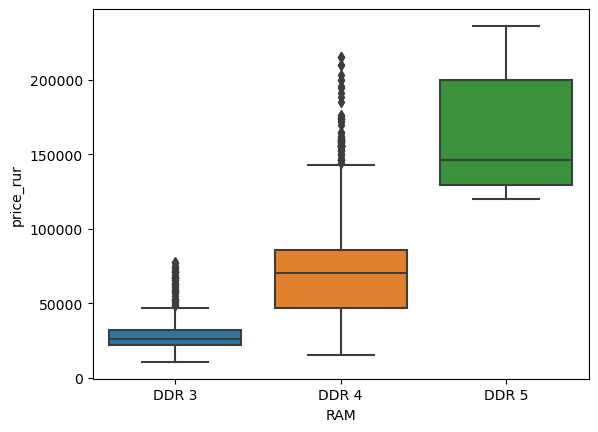

In [127]:
fig = sns.boxplot(x='RAM', y='price_rur', data=df_ram)

Проверим принадлежность нормальному закону распределения каждую подвыборку цены:

In [128]:
df_ddr3 = df_ram[df_ram['RAM']=='DDR 3']
df_ddr4 = df_ram[df_ram['RAM']=='DDR 4']
df_ddr5 = df_ram[df_ram['RAM']=='DDR 5']
print(stats.shapiro(df_ddr3['price_rur']))
print(stats.shapiro(df_ddr4['price_rur']))
print(stats.shapiro(df_ddr5['price_rur']))

ShapiroResult(statistic=0.7783865928649902, pvalue=4.25825018394512e-20)
ShapiroResult(statistic=0.9473546743392944, pvalue=3.6933489424446194e-31)
ShapiroResult(statistic=0.8539844155311584, pvalue=0.025167902931571007)


Как видно, для всех значений pvalue < 0,05 (уровня значимости), значит гипотезу о нормальности закона рапределения этих признаков отклоняем.

И поэтому переходим к выбору непараметрического критерия сравнения групп. Данные количественные, не принадлежит нормальной генеральной совокупности, групп > 2, данные в группах независимые, поэтому применяем критерий Краскала-Уиолиса:

In [129]:
df_ddr3 = np.array(df_ddr3['price_rur'])
df_ddr4 = np.array(df_ddr4['price_rur'])
df_ddr5 = np.array(df_ddr5['price_rur'])
stats.mstats.kruskalwallis(df_ddr3,df_ddr4,df_ddr5)

KruskalResult(statistic=593.4130558460151, pvalue=1.3867308536509317e-129)

#### Выводы: 
pvalue<0.05, следовательно отклоняем H0 о равенстве средних показателей, и выносим решение о том, что различия являются статистически значимыми.

Отсюда можно сделать вывод о том, что **тип оперативной памяти будет достаточно сильно влиять на цену ПК.**

#### Взаимосвязь 'price_rur' и 'Видеопроцессор'
Уникальных значений достаточно много, возьму только те модели, которые встречаются чаще всего. Там, где указан только бренд рассматривать не буду.

In [130]:
df_3['Видеопроцессор'].value_counts()

Видеопроцессор
nvidia geforce rtx 3060    581
nvidia geforce rtx 3050    447
nvidia geforce gtx 1650    322
nvidea                     286
nvidia geforce gtx 1660    271
amd                        258
amd radeon vega 7          212
intel hd graphics 2000     211
intel                      192
nvidia geforce rtx 3070    192
nvidia geforce gt 1030     184
nvidia geforce rtx 2060    108
Name: count, dtype: int64

In [154]:
df_video = df_3.query("Видеопроцессор != 'amd' and Видеопроцессор != 'nvidea' and Видеопроцессор != 'intel'")

In [155]:
df_video.groupby('Видеопроцессор')[['price_rur']].mean()

,price_rur
Видеопроцессор,
amd radeon vega 7,39689.504717
intel hd graphics 2000,24783.170616
nvidia geforce gt 1030,37980.309783
nvidia geforce gtx 1650,59148.714286
nvidia geforce gtx 1660,66741.704797
nvidia geforce rtx 2060,75140.490741
nvidia geforce rtx 3050,77264.237136
nvidia geforce rtx 3060,90340.903614
nvidia geforce rtx 3070,128988.093750


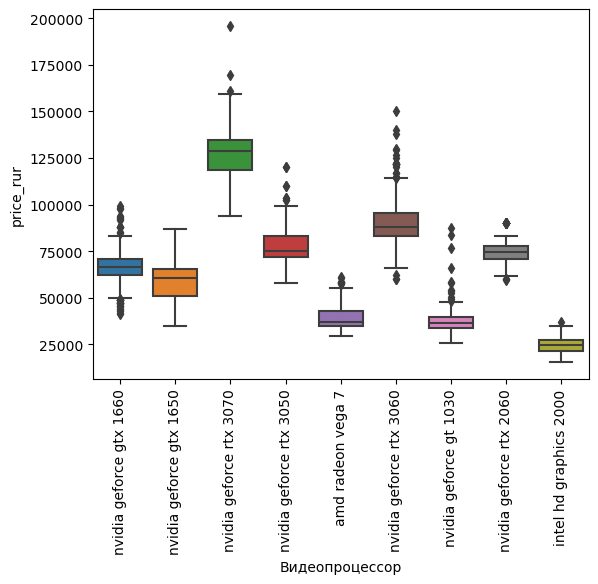

In [156]:
plt.xticks(fontsize = 10, rotation = 90)
fig = sns.boxplot(x='Видеопроцессор', y='price_rur', data=df_video)

Проверим принадлежность нормальному закону распределения каждую подвыборку цены:

In [157]:
df_rtx3060 = df_video[df_video['Видеопроцессор']=='nvidia geforce rtx 3060']
df_rtx3050 = df_video[df_video['Видеопроцессор']=='nvidia geforce rtx 3050']
df_gtx1650 = df_video[df_video['Видеопроцессор']=='nvidia geforce gtx 1650']
df_gtx1660 = df_video[df_video['Видеопроцессор']=='nvidia geforce gtx 1660']
df_vega7 = df_video[df_video['Видеопроцессор']=='amd radeon vega 7']
df_intel_hd = df_video[df_video['Видеопроцессор']=='intel hd graphics 2000']
df_rtx3070 = df_video[df_video['Видеопроцессор']=='nvidia geforce rtx 3070']
df_gt1030 = df_video[df_video['Видеопроцессор']=='nvidia geforce gt 1030']
df_rtx2060 = df_video[df_video['Видеопроцессор']=='nvidia geforce rtx 2060']
print(stats.shapiro(df_rtx3060['price_rur']))
print(stats.shapiro(df_rtx3050['price_rur']))
print(stats.shapiro(df_gtx1650['price_rur']))
print(stats.shapiro(df_gtx1660['price_rur']))
print(stats.shapiro(df_vega7['price_rur']))
print(stats.shapiro(df_intel_hd['price_rur']))
print(stats.shapiro(df_rtx3070['price_rur']))
print(stats.shapiro(df_gt1030['price_rur']))
print(stats.shapiro(df_rtx2060['price_rur']))

ShapiroResult(statistic=0.927570641040802, pvalue=3.9666248517453465e-16)
ShapiroResult(statistic=0.940722644329071, pvalue=2.313763980757444e-12)
ShapiroResult(statistic=0.9833691120147705, pvalue=0.0008815546752884984)
ShapiroResult(statistic=0.9675518274307251, pvalue=8.311017154483125e-06)
ShapiroResult(statistic=0.8905765414237976, pvalue=2.6612349476873298e-11)
ShapiroResult(statistic=0.9919628500938416, pvalue=0.2992912232875824)
ShapiroResult(statistic=0.92133629322052, pvalue=1.2527163306685907e-08)
ShapiroResult(statistic=0.6750807762145996, pvalue=1.3201185292814204e-18)
ShapiroResult(statistic=0.9039446115493774, pvalue=9.849667321759625e-07)


Как видно, для всех значений, кроме "intel hd graphics 2000"  pvalue < 0,05 (уровня значимости), значит гипотезу о нормальности закона рапределения этих признаков отклоняем. Для группы "intel hd graphics 2000" принимаем.

Но так как в наборе есть группы у которых распределение не по нормальному закону, переходим к выбору непараметрического критерия сравнения групп.

Данные количественные, не принадлежит нормальной генеральной совокупности, групп > 2, данные в группах независимые, поэтому применяем критерий Краскала-Уиолиса:

In [169]:
rtx3060 = np.array(df_rtx3060['price_rur'])
rtx3050 = np.array(df_rtx3050['price_rur'])
gtx1650 = np.array(df_gtx1650['price_rur'])
gtx1660 = np.array(df_gtx1660['price_rur'])
vega7 = np.array(df_vega7['price_rur'])
intel_hd = np.array(df_intel_hd['price_rur'])
rtx3070 = np.array(df_rtx3070['price_rur'])
gt1030 = np.array(df_gt1030['price_rur'])
rtx2060 = np.array(df_rtx2060['price_rur'])
stats.mstats.kruskalwallis(rtx3060,rtx3050,gtx1650,gtx1660,vega7,intel_hd,rtx3070,gt1030,rtx2060)

KruskalResult(statistic=2168.9655409941874, pvalue=0.0)

#### Выводы: 
p‑value ≈ 0, поэтому мы отвергаем H0 в пользу H1: **данные убедительно свидетельствуют, что между группами есть статистически значимые различия.**

**Модель видеопроцессора будет достаточно сильно влиять на цену ПК.**

#### Взаимосвязь 'price_rur' и 'Операционная система'

In [170]:
df_3['Операционная система'].value_counts()

Операционная система
windows 10       2151
windows 11        703
windows trial     261
отсутствует       144
windows            36
dos                28
Name: count, dtype: int64

Товары с меткой "не заполнено" в операционной системе рассматривать не будем, т.к. это может быть просто не заполненное значение по причине человеческого фактора, а не отсутствие операционной системы на ПК.

In [171]:
df_os = df_3.loc[df_3['Операционная система']!='отсутствует']

In [172]:
df_os.groupby('Операционная система')[['price_rur']].mean()

,price_rur
Операционная система,
dos,49972.321429
windows,52308.611111
windows 10,65964.145979
windows 11,76722.004267
windows trial,55689.164751


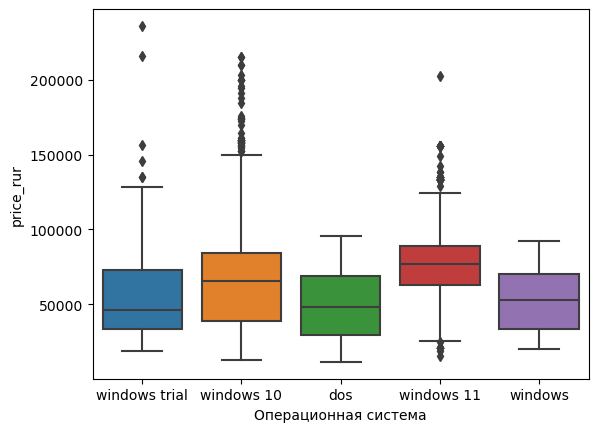

In [173]:
fig = sns.boxplot(x='Операционная система', y='price_rur', data=df_os)

Проверим принадлежность нормальному закону распределения каждую подвыборку цены:

In [175]:
df_w10 = df_os[df_os['Операционная система']=='windows 10']
df_w11 = df_os[df_os['Операционная система']=='windows 11']
df_wtrial = df_os[df_os['Операционная система']=='windows trial']
df_w = df_os[df_os['Операционная система']=='windows']
df_dos = df_os[df_os['Операционная система']=='dos']
print(stats.shapiro(df_w10['price_rur']))
print(stats.shapiro(df_w11['price_rur']))
print(stats.shapiro(df_wtrial['price_rur']))
print(stats.shapiro(df_w['price_rur']))
print(stats.shapiro(df_dos['price_rur']))

ShapiroResult(statistic=0.9387525916099548, pvalue=6.342426150166758e-29)
ShapiroResult(statistic=0.9505322575569153, pvalue=1.3374393586162384e-14)
ShapiroResult(statistic=0.828693687915802, pvalue=2.747627708918365e-16)
ShapiroResult(statistic=0.9136584401130676, pvalue=0.008237653411924839)
ShapiroResult(statistic=0.9547086358070374, pvalue=0.25956428050994873)


Как видно, для всех групп, кроме 'dos', значения pvalue < 0,05 (уровня значимости), значит гипотезу о нормальности закона рапределения этих признаков отклоняем. Для группы 'dos' принимаем.

Но так как в наборе есть группы у которых распределение не по нормальному закону, переходим к выбору непараметрического критерия сравнения групп.

Данные количественные, не принадлежит нормальной генеральной совокупности, групп > 2, данные в группах независимые, поэтому применяем критерий Краскала-Уиолиса:

In [176]:
df_win10 = np.array(df_w10['price_rur'])
df_win11 = np.array(df_w11['price_rur'])
df_trial = np.array(df_wtrial['price_rur'])
df_win = np.array(df_w['price_rur'])
df_d = np.array(df_dos['price_rur'])
stats.mstats.kruskalwallis(df_win10,df_win11,df_trial,df_win,df_d)

KruskalResult(statistic=160.86837964417714, pvalue=9.5209872572316e-34)

#### Выводы:
pvalue<0.05, следовательно отклоняем H0 о равенстве средних показателей, и выносим решение о том, что различия являются статистически значимыми.

Отсюда можно сделать вывод о том, что **версия операционной системы будет влиять на цену ПК.**

#### Взаимосвязь 'price_rur' и 'Cтрана производства'

In [177]:
df_3['Страна производства'].value_counts()

Страна производства
Россия        1626
не указано    1543
Китай          148
Беларусь         5
Тайвань          1
Name: count, dtype: int64

У признака 'Страна производства' 5 уникальное значений, причем некоторые из них встречаются не более 5 раз. Также много значений "не указано", что на самом деле может являться любой страной-производителем, и будет не показательно в исследовании, эти значения для анализа тоже не беру.
В итоге, провожу анализ только среди 2-х стран производства: Россия и Китай.

In [185]:
df_country = df_3.query('`Страна производства` == "Россия" or `Страна производства` == "Китай"')

In [186]:
df_country.groupby('Страна производства')[['price_rur']].mean()

,price_rur
Страна производства,
Китай,72014.567568
Россия,56831.581796


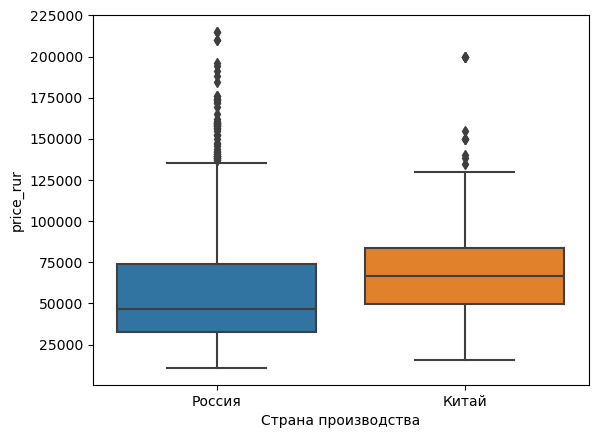

In [187]:
fig = sns.boxplot(x='Страна производства', y='price_rur', data=df_country)

Проверим принадлежность нормальному закону распределения каждую подвыборку цены:

In [188]:
df_chi = df_country[df_country['Страна производства']=='Китай']
df_rus = df_country[df_country['Страна производства']=='Россия']
print(stats.shapiro(df_chi['price_rur']))
print(stats.shapiro(df_rus['price_rur']))

ShapiroResult(statistic=0.8860343098640442, pvalue=2.776379348645719e-09)
ShapiroResult(statistic=0.8663693070411682, pvalue=3.9438702167582737e-35)


Как видно, для всех значений pvalue < 0,05 (уровня значимости), значит гипотезу о нормальности закона рапределения этих признаков отклоняем.

И поэтому переходим к выбору непараметрического критерия сравнения групп. Данные количественные, не принадлежит нормальной генеральной совокупности, групп - 2, данные в группах независимые, поэтому применяем критерий Манна-Уитни:

In [189]:
scipy.stats.mannwhitneyu(df_chi['price_rur'],df_rus['price_rur'])

MannwhitneyuResult(statistic=156303.5, pvalue=1.6350244327115333e-09)

#### Выводы:
pvalue<0.05, следовательно отклоняем H0 о равенстве средних показателей, и выносим решение о том, что различия являются статистически значимыми.

Отсюда можно сделать вывод о том, что **страна производства будет достаточно сильно влиять на цену ПК.**

Также есть несколько числовых признаков, которые я планирую включить в модель, и можно уже сейчас проверить их на мультиколлинеарность с теми категориальными показателями , которые влияют на цену ПК: 
:
* 'CPU' - тип процессора
* 'RAM' - тип оперативнойпамаяти
* 'Видеопроцессор'
* 'Операционная система'
* 'Страна произвдства'водства'

#### Взаимосвязь 'cores' и 'CPU'
Гипотезу о нормальности закона рапределения 'CPU' уже проверили и отклонили.

Поэтому переходим к выбору непараметрического критерия сравнения групп.
Данные количественные, не принадлежат нормальной генеральной совокупности, групп > 2, данные в группах независимые, поэтому применяем критерий Краскала-Уиолиса:

In [195]:
df_cpu1=np.array(df_i5['cores'])
df_cpu2=np.array(df_i7['cores'])
df_cpu3=np.array(df_i3['cores'])
df_cpu4=np.array(df_ryzen5['cores'])
df_cpu5=np.array(df_amd['cores'])
df_cpu6=np.array(df_intel['cores'])
df_cpu7=np.array(df_ryzen7['cores'])

In [196]:
stats.mstats.kruskalwallis(df_cpu1,df_cpu2,df_cpu3,df_cpu4,df_cpu5,df_cpu6,df_cpu7)

KruskalResult(statistic=2187.2716848912723, pvalue=0.0)

#### Выводы: 
p‑value ≈ 0, поэтому мы отвергаем H0 в пользу H1: **данные убедительно свидетельствуют, что между группами есть статистически значимые различия.** 

#### Взаимосвязь 'cores' и 'RAM'
Гипотезу о нормальности закона рапределения 'RAM' уже проверили и отклонили.

Поэтому переходим к выбору непараметрического критерия сравнения групп.
Данные количественные, не принадлежат нормальной генеральной совокупности, групп > 2, данные в группах независимые, поэтому применяем критерий Краскала-Уиолиса:

In [214]:
df_ddr3 = df_cores[df_cores['RAM']=='DDR 3']
df_ddr4 = df_cores[df_cores['RAM']=='DDR 4']
df_ddr5 = df_cores[df_cores['RAM']=='DDR 5']

In [215]:
df_ddr3 = np.array(df_cores['cores'])
df_ddr4 = np.array(df_cores['cores'])
df_ddr5 = np.array(df_cores['cores'])
stats.mstats.kruskalwallis(df_ddr3,df_ddr4,df_ddr5)

KruskalResult(statistic=1.0146464438947098e-12, pvalue=0.9999999999994926)

#### Выводы:
p‑value > 0.05, поэтому нет причин отклонить H0.

То есть **статистически значимой свзяи между cores и RAM не обнаружено.**

#### Взаимосвязь 'cores' и 'Видеопроцессор'
Гипотезу о нормальности закона рапределения 'Видеопроцессоров' уже проверили и отклонили у всех, кроме одного.

Поэтому переходим к выбору непараметрического критерия сравнения групп.
Данные количественные, не принадлежат нормальной генеральной совокупности, групп > 2, данные в группах независимые, поэтому применяем критерий Краскала-Уиолиса:

In [217]:
df_video = df_video.dropna(subset='cores', inplace=True)

C:\Users\imaru\AppData\Local\Temp\ipykernel_9100\526317577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_video = df_video.dropna(subset='cores', inplace=True)


In [ ]:
df_rtx3060 = df_video[df_video['Видеопроцессор']=='nvidia geforce rtx 3060']
df_rtx3050 = df_video[df_video['Видеопроцессор']=='nvidia geforce rtx 3050']
df_gtx1650 = df_video[df_video['Видеопроцессор']=='nvidia geforce gtx 1650']
df_gtx1660 = df_video[df_video['Видеопроцессор']=='nvidia geforce gtx 1660']
df_vega7 = df_video[df_video['Видеопроцессор']=='amd radeon vega 7']
df_intel_hd = df_video[df_video['Видеопроцессор']=='intel hd graphics 2000']
df_rtx3070 = df_video[df_video['Видеопроцессор']=='nvidia geforce rtx 3070']
df_gt1030 = df_video[df_video['Видеопроцессор']=='nvidia geforce gt 1030']
df_rtx2060 = df_video[df_video['Видеопроцессор']=='nvidia geforce rtx 2060']

Нахожу средние значения цены по значениям ТОП-9 типов процессора.

In [220]:
df_video.head()

AttributeError: 'NoneType' object has no attribute 'head'

Text(0, 0.5, 'Количество продаж ПК')

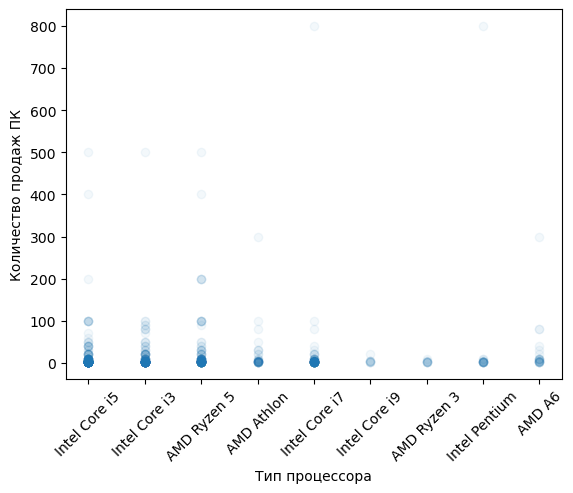

In [127]:
plt.xticks(fontsize = 10, rotation = 45)
plt.plot(df_TopCPUs['CPU'], df_TopCPUs['sales'], 'o', alpha=0.05)
plt.xlabel('Тип процессора')
plt.ylabel('Количество продаж ПК')

На графике видно, что у некоторых моделей процессора частоты выше, чем у других. Это повод проверить гипотезу о наличии связи между продажами и типом процессора.

Сначала проверим принадлежит ли нормальному закону распределения каждая подгруппа.

In [128]:
df_a6 = df_sales[df_sales['CPU']=='AMD A6']
df_athlon = df_sales[df_sales['CPU']=='AMD Athlon']
df_ryzen3 = df_sales[df_sales['CPU']=='AMD Ryzen 3']
df_ryzen5 = df_sales[df_sales['CPU']=='AMD Ryzen 5']
df_i3 = df_sales[df_sales['CPU']=='Intel Core i3']
df_i5 = df_sales[df_sales['CPU']=='Intel Core i5']
df_i7 = df_sales[df_sales['CPU']=='Intel Core i7']
df_i9 = df_sales[df_sales['CPU']=='Intel Core i9']
df_pen = df_sales[df_sales['CPU']=='Intel Pentium']

print(stats.shapiro(df_a6['sales']))
print(stats.shapiro(df_athlon['sales']))
print(stats.shapiro(df_ryzen3['sales']))
print(stats.shapiro(df_ryzen5['sales']))
print(stats.shapiro(df_i3['sales']))
print(stats.shapiro(df_i5['sales']))
print(stats.shapiro(df_i7['sales']))
print(stats.shapiro(df_i9['sales']))
print(stats.shapiro(df_pen['sales']))

ShapiroResult(statistic=0.4318806529045105, pvalue=1.308723707182935e-08)
ShapiroResult(statistic=0.3869972825050354, pvalue=1.9910567986003436e-11)
ShapiroResult(statistic=0.6199417114257812, pvalue=9.569522808305919e-05)
ShapiroResult(statistic=0.35698962211608887, pvalue=1.2856712407240386e-22)
ShapiroResult(statistic=0.26006245613098145, pvalue=3.836476854603629e-25)
ShapiroResult(statistic=0.2503383159637451, pvalue=4.469432271091967e-30)
ShapiroResult(statistic=0.1306343674659729, pvalue=2.0008368106664015e-21)
ShapiroResult(statistic=0.596031904220581, pvalue=8.594859536970034e-05)
ShapiroResult(statistic=0.2526204586029053, pvalue=6.0512830302172915e-09)


Как видно, для всех значений pvalue < 0,05 (уровня значимости), значит гипотезу о нормальности закона рапределения этих признаков отклоняем.

И поэтому переходим к выбору непараметрического критерия сравнения групп.
Данные количественные, не принадлежит нормальной генеральной совокупности, групп > 2, данные в группах независимые, поэтому применяем критерий Краскала-Уиолиса:

In [129]:
df_cpu1=np.array(df_a6['sales'])
df_cpu2=np.array(df_athlon['sales'])
df_cpu3=np.array(df_ryzen3['sales'])
df_cpu4=np.array(df_ryzen5['sales'])
df_cpu5=np.array(df_i3['sales'])
df_cpu6=np.array(df_i5['sales'])
df_cpu7=np.array(df_i7['sales'])
df_cpu8=np.array(df_i9['sales'])
df_cpu9=np.array(df_pen['sales'])

In [130]:
stats.mstats.kruskalwallis(df_cpu1,df_cpu2,df_cpu3,df_cpu4,df_cpu5,df_cpu6,df_cpu7,df_cpu8,df_cpu9)

KruskalResult(statistic=23.79748150507738, pvalue=0.002477945504367278)

#### Выводы:
pvalue<0.05, следовательно отклоняем H0 о равенстве средних показателей, и выносим решение о том, что различия являются статистически значимыми.

Отсюда можно сделать вывод о том, что **тип процессора будет влиять на количество продаж.**

#### **Взаимосвязь 'sales' и 'RAM'**

In [131]:
df_sales['RAM'].value_counts()

RAM
1               647
0               124
не заполнено      8
2                 2
Name: count, dtype: int64

'DDR 5' (закодированная под значением "2") встречается всего 2 раза, поэтому будем рассматривать только средние значения 'DDR 4' и 'DDR 3'.

In [132]:
df_sales['counts'] = df_sales['RAM'].map(df_sales['RAM'].value_counts())
df_ram = df_sales.loc[df_sales['counts'] > 70]
df_ram

,title,price_rur,sales,seller_rating,CPU,cores,RAM,size_of_RAM_GB,size_of_HDD_GB,size_of_SSD_GB,Видеопроцессор,Операционная система,Страна производства,Гарантийный срок(мес.),counts
0,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400.0,NaN,Intel Celeron,2.0,0,4,NaN,NaN,Intel HD Graphics,3,0.0,36.0,124
3,Офисный Компьютер Robotcomp Казначей V1,39237,10.0,4.7,Intel Core i5,6.0,1,8,NaN,500.0,Intel UHD Graphics 630,2,0.0,36.0,647
4,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200.0,4.7,Intel Core i5,6.0,1,16,NaN,1000.0,NVIDIA GeForce GTX 1660,2,0.0,36.0,647
5,Игровой Компьютер Robotcomp M-16 V1,55625,40.0,4.7,Intel Core i5,6.0,1,16,NaN,500.0,NVIDIA GeForce GTX 1650,2,0.0,36.0,647
6,Игровой Компьютер Robotcomp Анаконда 2.0 V1,128284,5.0,4.7,Intel Core i5,10.0,1,16,NaN,1000.0,NVIDIA GeForce RTX 3070,2,0.0,36.0,647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,"Компьютер Beelink SEI 12, 32/500Гб",58047,2.0,4.3,Intel Core i5,10.0,1,32,NaN,500.0,не заполнено,1,1.0,6.0,647
2443,Игровой компьютер BEST Family Midi Intel Core ...,37998,2.0,5.0,Intel Core i5,6.0,1,8,NaN,500.0,AMD Radeon RX 550,0,0.0,12.0,647
2464,"Игровой компьютер, системный блок",29200,2.0,0.0,Intel Core i5,4.0,0,8,NaN,120.0,NVIDIA GeForce GT 1030,0,0.0,12.0,124
2466,"Офисный компьютер, системный блок",27880,2.0,0.0,Intel Core i3,4.0,1,8,NaN,250.0,Intel HD Graphics 4000,0,0.0,12.0,647


In [133]:
df_ram.groupby('RAM')[['sales']].mean()

,sales
RAM,
0,23.935484
1,15.836167


C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Количество продаж ПК')

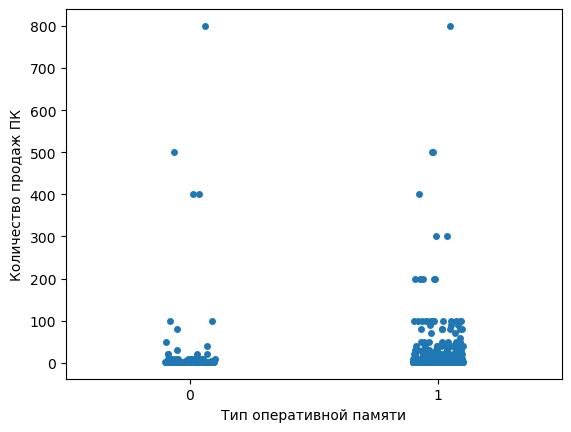

In [134]:
sns.stripplot(x='RAM', y='sales', data=df_ram)
plt.xlabel('Тип оперативной памяти')
plt.ylabel('Количество продаж ПК')

По графику уже видна небольшая разница в частотах. Будем проверять наличие связи между показателями.

Проверим принадлежность нормальному закону распределения каждую подвыборку цены:

In [135]:
df_ddr3 = df_sales[df_sales['RAM']=='0']
df_ddr4 = df_sales[df_sales['RAM']=='1']
print(stats.shapiro(df_ddr3['sales']))
print(stats.shapiro(df_ddr4['sales']))

ShapiroResult(statistic=0.23089200258255005, pvalue=1.2105127388601602e-22)
ShapiroResult(statistic=0.2550966143608093, pvalue=8.407790785948902e-45)


Как видно, для всех значений pvalue < 0,05 (уровня значимости), значит гипотезу о нормальности закона рапределения этих признаков отклоняем.

И поэтому переходим к выбору непараметрического критерия сравнения групп. Данные количественные, не принадлежит нормальной генеральной совокупности, группы 2, данные в группах независимые, поэтому применяем критерий Манна-Уитни:

In [136]:
scipy.stats.mannwhitneyu(df_ddr3['sales'],df_ddr4['sales'])

MannwhitneyuResult(statistic=36284.5, pvalue=0.06321105042751515)

Выводы: pvalue>0.05, следовательно нет причин отклонить гипотезу H0 о равенстве средних показателей, и выносим решение о том, что различия являются статистически незначимыми.

Отсюда можно сделать вывод о том, что **тип оперативной памяти не будет влиять на количество продаж.**

#### **Взаимосвязь 'sales' и 'size_of_SSD_GB'**

In [137]:
df_sales['size_of_SSD_GB'].value_counts()

size_of_SSD_GB
500.0     426
250.0     157
1000.0    115
120.0      57
Name: count, dtype: int64

У признака 'size_of_SSD_GB' 5 уникальных значений, значение "200" встречается очень редко. Поэтому не будем рассматривать эту группу.

In [138]:
df_sales['counts'] = df_sales['size_of_SSD_GB'].map(df_sales['size_of_SSD_GB'].value_counts())
df_SSD = df_sales.loc[df_sales['counts'] >= 50]

In [139]:
df_SSD.groupby('size_of_SSD_GB')[['sales']].mean()

,sales
size_of_SSD_GB,
120.0,19.140351
250.0,17.286624
500.0,18.476526
1000.0,8.443478


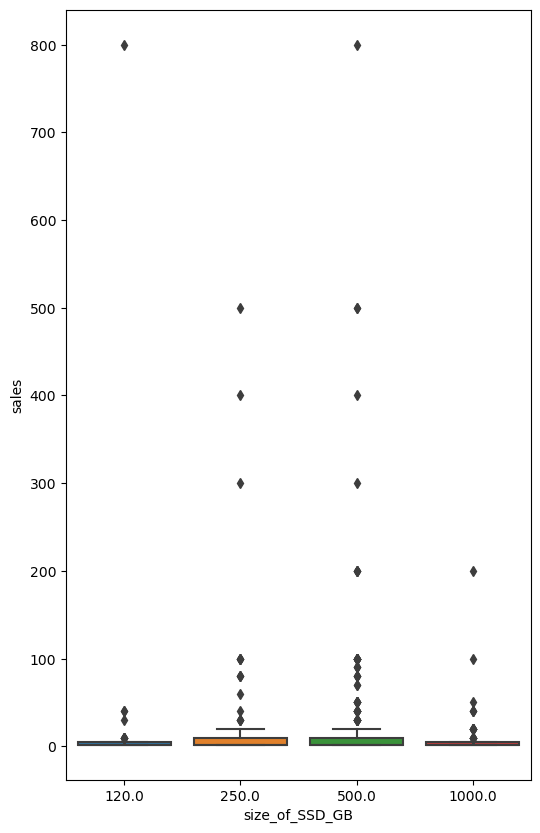

In [140]:
f, ax = plt.subplots(figsize=(6, 10))
fig = sns.boxplot(x='size_of_SSD_GB', y='sales', data=df_SSD)

Проверим принадлежность нормальному закону распределения каждую подвыборку цены:

In [141]:
df_ssd120 = df_SSD[df_SSD['size_of_SSD_GB']==120]
df_ssd250 = df_SSD[df_SSD['size_of_SSD_GB']==250]
df_ssd500 = df_SSD[df_SSD['size_of_SSD_GB']==500]
df_ssd1000 = df_SSD[df_SSD['size_of_SSD_GB']==1000]
print(stats.shapiro(df_ssd120['sales']))
print(stats.shapiro(df_ssd250['sales']))
print(stats.shapiro(df_ssd500['sales']))
print(stats.shapiro(df_ssd1000['sales']))

ShapiroResult(statistic=0.14513534307479858, pvalue=1.6522407310621634e-16)
ShapiroResult(statistic=0.2695080637931824, pvalue=1.1617388890399744e-24)
ShapiroResult(statistic=0.2646903991699219, pvalue=7.459620116683858e-38)
ShapiroResult(statistic=0.3008813261985779, pvalue=5.4180511875775876e-21)


Как видно, для всех значений pvalue < 0,05 (уровня значимости), значит гипотезу о нормальности закона рапределения этих признаков отклоняем.

И поэтому переходим к выбору непараметрического критерия сравнения групп. Данные количественные, не принадлежит нормальной генеральной совокупности, групп > 2, данные в группах независимые, поэтому применяем критерий Краскала-Уиолиса:

In [142]:
df_ssd1 = np.array(df_ssd120['sales'])
df_ssd2 = np.array(df_ssd250['sales'])
df_ssd3 = np.array(df_ssd500['sales'])
df_ssd4 = np.array(df_ssd1000['sales'])
stats.mstats.kruskalwallis(df_ssd1,df_ssd2,df_ssd3,df_ssd4)

KruskalResult(statistic=7.4338835957237235, pvalue=0.059281823802414674)

#### Выводы: 
pvalue>0.05, следовательно нет причин отклонить гипотезу H0 о равенстве средних показателей, и выносим решение о том, что различия являются статистически незначимыми.

Отсюда можно сделать вывод о том, что **объем твердотельного накопителя не будет влиять на количество продаж.**

#### Взаимосвязь 'sales' и 'Видеопроцессор'

In [143]:
df_sales['Видеопроцессор'].value_counts()

Видеопроцессор
AMD Radeon Vega 7          97
NVIDIA GeForce RTX 3050    91
NVIDIA GeForce GT 1030     86
Intel HD Graphics 2000     83
NVIDIA GeForce RTX 3060    75
NVIDIA GeForce GTX 1650    70
NVIDIA GeForce GTX 1660    52
AMD Radeon Vega 3          26
NVIDIA GeForce RTX 3070    24
AMD Radeon R5              24
не заполнено               21
NVIDIA GeForce RTX 3080    19
Intel UHD Graphics 630     16
NVIDIA GeForce RTX 2060    13
Intel UHD Graphics 610     11
NVIDIA GeForce GTX 1050    10
NVIDIA GeForce GTX 1630     6
Intel HD Graphics           6
Intel UHD Graphics 605      4
Intel HD Graphics 630       4
AMD Radeon Vega 8           4
NVIDIA                      3
Intel UHD Graphics 600      3
intel UHD Graphics 750      3
AMD Radeon RX 6500          3
NVIDIA GeForce GT 730       3
AMD Radeon RX 580           3
AMD Radeon RX 6600          2
Intel HD Graphics 2500      2
AMD Radeon RX 550           2
Intel HD Graphics 6000      1
AMD Radeon RX 470           1
Intel HD Graphics 4000   

У признака 'Видеопроцессор' очень много уникальных значений, поэтому проведем анализ только по 4 самых часто встречающимся типам видеопроцессоров (остальные встречаются меньше, чем в 10% товаров из набора).

In [144]:
df_sales['counts'] = df_sales['Видеопроцессор'].map(df_sales['Видеопроцессор'].value_counts())
df_GPU = df_sales.loc[df_sales['counts'] > 80]

In [145]:
df_GPU.groupby('Видеопроцессор')[['sales']].mean()

,sales
Видеопроцессор,
AMD Radeon Vega 7,31.989691
Intel HD Graphics 2000,6.144578
NVIDIA GeForce GT 1030,28.267442
NVIDIA GeForce RTX 3050,7.802198


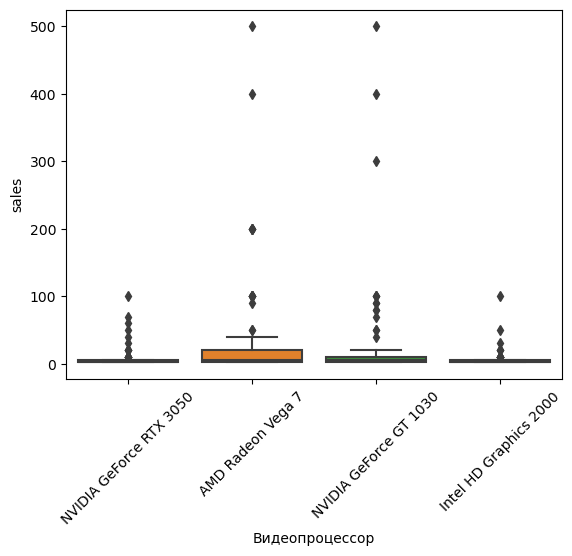

In [146]:
plt.xticks(fontsize = 10, rotation = 45)
fig = sns.boxplot(x='Видеопроцессор', y='sales', data=df_GPU)

Проверим принадлежность нормальному закону распределения каждую подвыборку цены:

In [147]:
df_nv1650 = df_sales[df_sales['Видеопроцессор']=='AMD Radeon Vega 7']
df_nv1660 = df_sales[df_sales['Видеопроцессор']=='NVIDIA GeForce RTX 3050']
df_nv3050 = df_sales[df_sales['Видеопроцессор']=='NVIDIA GeForce GT 1030']
df_nv3060 = df_sales[df_sales['Видеопроцессор']=='Intel HD Graphics 2000']
print(stats.shapiro(df_nv1650['sales']))
print(stats.shapiro(df_nv1660['sales']))
print(stats.shapiro(df_nv3050['sales']))
print(stats.shapiro(df_nv3060['sales']))

ShapiroResult(statistic=0.4364356994628906, pvalue=1.477713827445151e-17)
ShapiroResult(statistic=0.4255760908126831, pvalue=3.6011089591814346e-17)
ShapiroResult(statistic=0.3698292374610901, pvalue=1.9070958387959148e-17)
ShapiroResult(statistic=0.34935927391052246, pvalue=2.0897348365057856e-17)


Как видно, для всех значений pvalue < 0,05 (уровня значимости), значит гипотезу о нормальности закона рапределения этих признаков отклоняем.

И поэтому переходим к выбору непараметрического критерия сравнения групп. Данные количественные, не принадлежит нормальной генеральной совокупности, групп > 2, данные в группах независимые, поэтому применяем критерий Краскала-Уиолиса:

In [148]:
df_gf1650 = np.array(df_nv1650['sales'])
df_gf1660 = np.array(df_nv1660['sales'])
df_gf3050 = np.array(df_nv3050['sales'])
df_gf3060 = np.array(df_nv3060['sales'])
stats.mstats.kruskalwallis(df_gf1650,df_gf1660,df_gf3050,df_gf3060)

KruskalResult(statistic=26.85141570471804, pvalue=6.325095029229432e-06)

#### Выводы: 
pvalue > 0.05, следовательно нет причин отклонить гипотезу H0 о равенстве средних показателей, и выносим решение о том, что различия являются статистически незначимыми.

Отсюда можно сделать вывод о том, что **тип видеопроцессора не будет влиять на количество продаж.**

#### **Взаимосвязь 'sales' и 'Операционная система'**

In [149]:
df_sales['Операционная система'].value_counts()

Операционная система
0    587
2    101
3     53
1     23
4     10
5      7
Name: count, dtype: int64

У признака 'Операционная система' проведем анализ только по топ 3 самых часто встречающихся типов операционных систем (остальные встречаются меньше, чем в 10% товаров из набора).

Товары с меткой "не заполнено" в операционной системе рассматривать не будем, т.к. это может быть просто не заполненное значение по причине человеческого фактора, а не действительное отсутствие операционной системы на ПК.

In [150]:
df_sales['counts'] = df_sales['Операционная система'].map(df_sales['Операционная система'].value_counts())
df_os = df_sales.loc[df_sales['counts'] >= 20]

In [151]:
df_os.groupby('Операционная система')[['sales']].mean()

,sales
Операционная система,
0,12.676320
1,5.869565
2,26.564356
3,30.566038


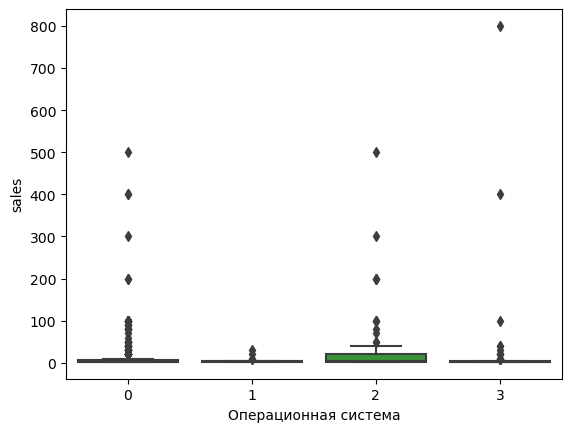

In [152]:
plt.xticks(fontsize = 10)
fig = sns.boxplot(x='Операционная система', y='sales', data=df_os)

Проверим принадлежность нормальному закону распределения каждую подвыборку цены:

In [153]:
df_w10 = df_os[df_os['Операционная система']==0]
df_wt = df_os[df_os['Операционная система']==2]
df_no_os = df_os[df_os['Операционная система']==3]
df_w11 = df_os[df_os['Операционная система']==1]
print(stats.shapiro(df_w10['sales']))
print(stats.shapiro(df_wt['sales']))
print(stats.shapiro(df_no_os['sales']))
print(stats.shapiro(df_w11['sales']))

ShapiroResult(statistic=0.2724981904029846, pvalue=8.015427215937954e-43)
ShapiroResult(statistic=0.39756661653518677, pvalue=1.8139392545185603e-18)
ShapiroResult(statistic=0.24554508924484253, pvalue=5.130997792715964e-15)
ShapiroResult(statistic=0.5965241193771362, pvalue=8.265877227131568e-07)


Как видно, для всех значений pvalue < 0,05 (уровня значимости), значит гипотезу о нормальности закона рапределения этих признаков отклоняем.

И поэтому переходим к выбору непараметрического критерия сравнения групп. Данные количественные, не принадлежит нормальной генеральной совокупности, групп > 2, данные в группах независимые, поэтому применяем критерий Краскала-Уиолиса:

In [156]:
df_w10 = np.array(df_w10['sales'])
df_wt = np.array(df_wt['sales'])
df_no_os = np.array(df_no_os['sales'])
df_w11 = np.array(df_w11['sales'])
stats.mstats.kruskalwallis(df_w10,df_wt,df_no_os, df_w11)

KruskalResult(statistic=16.18980762135105, pvalue=0.001036766433605816)

#### Выводы: 
pvalue<0.05, следовательно отклоняем H0 о равенстве средних показателей, и выносим решение о том, что различия являются статистически значимыми.

Отсюда можно сделать вывод о том, что **наличие и версия операционной системы будут влиять на количество продаж ПК.**

#### **Взаимосвязь 'sales' и 'Cтрана производства'**

In [157]:
df_sales['Страна производства'].value_counts()

Страна производства
0.0    623
1.0     64
Name: count, dtype: int64

In [158]:
df_sales.groupby('Страна производства')[['sales']].mean()

,sales
Страна производства,
0.0,17.603531
1.0,5.312500


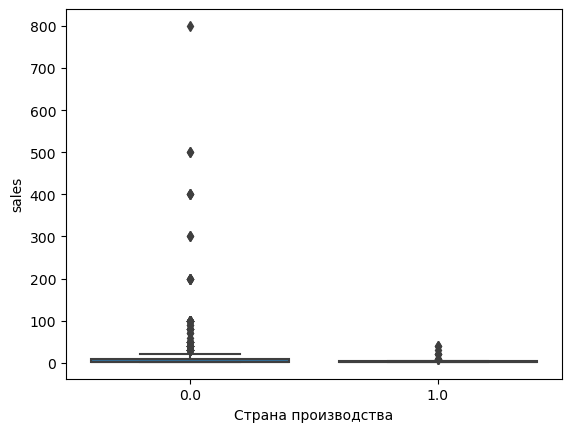

In [159]:
fig = sns.boxplot(x='Страна производства', y='sales', data=df_sales)

Проверим принадлежность нормальному закону распределения каждую подвыборку цены:

In [160]:
df_chi = df_sales[df_sales['Страна производства']==0]
df_rus = df_sales[df_sales['Страна производства']==1]
print(stats.shapiro(df_chi['sales']))
print(stats.shapiro(df_rus['sales']))

ShapiroResult(statistic=0.266781210899353, pvalue=6.165713243029195e-44)
ShapiroResult(statistic=0.46328550577163696, pvalue=6.301776727399636e-14)


Как видно, для обоих значений pvalue < 0,05 (уровня значимости), значит гипотезу о нормальности закона рапределения этих признаков отклоняем.

И поэтому переходим к выбору непараметрического критерия сравнения групп. Данные количественные, не принадлежит нормальной генеральной совокупности, группы 2, данные в группах независимые, поэтому применяем критерий Манна-Уитни:

In [161]:
scipy.stats.mannwhitneyu(df_chi['sales'],df_rus['sales'])

MannwhitneyuResult(statistic=24295.5, pvalue=0.001726344932780033)

### Результаты:

в результате исследования выяснилось, что на цену товара влияют следующие категориальные признаки:
* 'CPU' - тип процессора
* 'RAM' - тип оперативнойпамаяти
* 'Видеопроцессор'
* 'Операционная система'
* 'Страна производства'вдства

## Связь категориальных признаков

В предоставленном наборе 3 категориальных признака: 'CPU', 'RAM', 'size_of_SSD_GB', 'Видеопроцессор', 'Операционная система', 'Страна производства'.


### Связь типа процессора и объема оперативной памяти

In [162]:
df_3['CPU'].value_counts()

CPU
Intel Core i5        1091
Intel Core i7         680
Intel Core i3         490
AMD Ryzen 5           486
AMD Athlon            120
Intel Xeon             73
AMD Ryzen 7            71
AMD Ryzen 3            52
AMD A6                 45
Intel Pentium          38
Intel E5               22
Intеl Core Quad        17
Intel Core i9          12
Intel E3               11
Intel Celeron           7
AMD Ryzen 9             4
AMD A12-9800E           4
Intel                   4
AMD Ryzen 6             2
AMD FX-6100             2
AMD E1-6010             2
AMD Radeon RX 570       2
Intel N5105             1
AMD A10-5800K           1
AMD FX-4300             1
Name: count, dtype: int64

В признаке 'CPU' у нас очень много значений, рассмотрим только самые популярные из них.

In [163]:
df_3['counts'] = df_3['CPU'].map(df_3['CPU'].value_counts())
df_cpu = df_3.loc[(df_3['counts'] >= 490)&(df_3['RAM']!='не заполнено')]
df_cpu2 = df_cpu.loc[df_cpu['RAM']!='DDR 5']

Строим таблицу сопряженности.

In [164]:
CR = pd.crosstab(df_cpu2['CPU'],df_cpu2['RAM']); CR

RAM,0,1,2
CPU,,,
Intel Core i3,86,400,0
Intel Core i5,105,976,5
Intel Core i7,99,578,3


Видно, что частоты отличаются очень сильно.

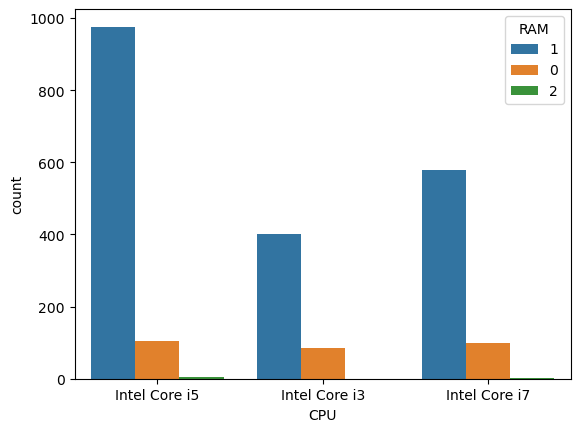

In [165]:
sns.countplot(x=df_cpu2['CPU'], hue=df_cpu2['RAM']);

По графику также видна существенная разница в частотах. Проверим это с помощью критерия хи-квадрат.

Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [166]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(CR)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 23.709734025047815
degrees of freedom: 4
p-value: 9.131965474243034e-05



pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что связь между этими показателями является статистически значимой.

### Связь типа процессора и объема твердотельного накопителя
для оценки взаимосвязи показателей возьмем только самые популярные типы процессоров и объемы SSD.

In [167]:
df_3['size_of_SSD_GB'].value_counts()

size_of_SSD_GB
500.0     1550
1000.0     897
250.0      641
120.0      187
Name: count, dtype: int64

In [168]:
df_3['counts'] = df_3['CPU'].map(df_3['CPU'].value_counts())
df_3['counts_2'] = df_3['size_of_SSD_GB'].map(df_3['size_of_SSD_GB'].value_counts())
df_CS = df_3.loc[(df_3['counts'] > 400)&(df_3['counts_2'] > 180)]

In [169]:
CS = pd.crosstab(df_CS['CPU'],df_CS['size_of_SSD_GB'])
CS

size_of_SSD_GB,120.0,250.0,500.0,1000.0
CPU,,,,
AMD Ryzen 5,8,65,321,92
Intel Core i3,54,125,249,45
Intel Core i5,36,149,477,416
Intel Core i7,19,44,274,331


AttributeError: 'numpy.float64' object has no attribute 'startswith'

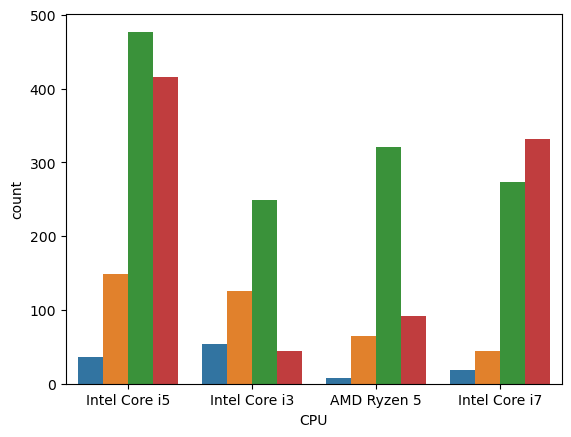

In [170]:
sns.countplot(x=df_CS['CPU'], hue=df_CS['size_of_SSD_GB'])


По графику также видна существенная разница в частотах.. Проверим это с помощью критерия хи-квадрат.

Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(CS)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что связь между этими показателями является статистически значимой.

#### Связь типа процессора и видеопроцессора
для оценки взаимосвязи показателей возьмем только самые популярные типы процессоров и типы видеопроцессоров.

In [171]:
df_3['Видеопроцессор'].value_counts()

Видеопроцессор
NVIDIA GeForce RTX 3060    581
NVIDIA GeForce RTX 3050    447
NVIDIA GeForce GTX 1650    322
NVIDIA GeForce GTX 1660    271
AMD Radeon Vega 7          212
                          ... 
NVIDIA GeForce RTX 4080      1
Intel UHD Graphics           1
RX 460                       1
AMD Radeon Vega 6            1
NVIDIA GeForce GTX 970       1
Name: count, Length: 71, dtype: int64

In [172]:
df_3['counts'] = df_3['CPU'].map(df_3['CPU'].value_counts())
df_3['counts_2'] = df_3['Видеопроцессор'].map(df_3['Видеопроцессор'].value_counts())
df_CG = df_3.loc[(df_3['counts'] > 490)&(df_3['counts_2'] > 230)]

In [173]:
CG = pd.crosstab(df_CG['CPU'],df_CG['Видеопроцессор'])
CG

Видеопроцессор,NVIDIA GeForce GTX 1650,NVIDIA GeForce GTX 1660,NVIDIA GeForce RTX 3050,NVIDIA GeForce RTX 3060
CPU,,,,
Intel Core i5,129,138,216,254
Intel Core i7,55,48,67,217


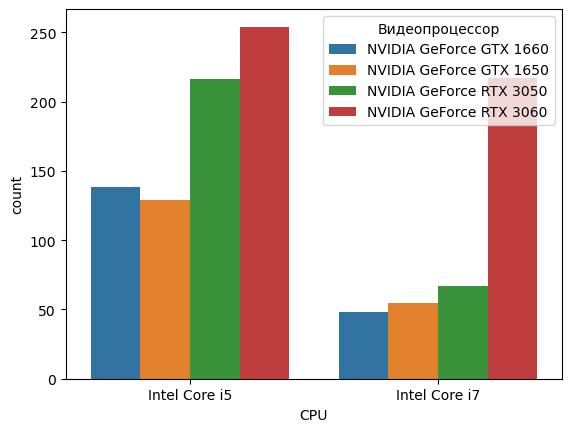

In [174]:
sns.countplot(x=df_CG['CPU'], hue=df_CG['Видеопроцессор']);

По графику явной закономерности не видно, но разница в частотах наблюдается.

Проверить, существует ли связь между факторами, используя критерий хи-квадрат, так как в таблице у нас есть один фактор, у которого частота < 5. Поэтому применяем точный критерий Фишера.

Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [175]:
def _dfs(mat, pos, r_sum, c_sum, p_0, p):

    (xx, yy) = pos
    (r, c) = (len(r_sum), len(c_sum))

    mat_new = []

    for i in range(len(mat)):
        temp = []
        for j in range(len(mat[0])):
            temp.append(mat[i][j])
        mat_new.append(temp)

    if xx == -1 and yy == -1:
        for i in range(r-1):
            temp = r_sum[i]
            for j in range(c-1):
                temp -= mat_new[i][j]
            mat_new[i][c-1] = temp
        for j in range(c-1):
            temp = c_sum[j]
            for i in range(r-1):
                temp -= mat_new[i][j]
            mat_new[r-1][j] = temp
        temp = r_sum[r-1]
        for j in range(c-1):
            temp -= mat_new[r-1][j]
        if temp <0:
            return
        mat_new[r-1][c-1] = temp

        p_1 = 1
        for x in r_sum:
            p_1 *= math.factorial(x)
        for y in c_sum:
            p_1 *= math.factorial(y)

        n = 0
        for x in r_sum:
            n += x
        p_1 /= math.factorial(n)

        for i in range(len(mat_new)):
            for j in range(len(mat_new[0])):
                p_1 /= math.factorial(mat_new[i][j])
        if p_1 <= p_0 + 0.00000001:
            #print(mat_new)
            #print(p_1)
            p[0] += p_1
    else:
        max_1 = r_sum[xx]
        max_2 = c_sum[yy]
        for j in range(c):
            max_1 -= mat_new[xx][j]
        for i in range(r):
            max_2 -= mat_new[i][yy]
        for k in range(min(max_1,max_2)+1):
            mat_new[xx][yy] = k
            if xx == r-2 and yy == c-2:
                pos_new = (-1, -1)
            elif xx == r-2:
                pos_new = (0, yy+1)
            else:
                pos_new = (xx+1, yy)
            _dfs(mat_new, pos_new, r_sum, c_sum, p_0, p)


def fisher_exact(table):

    row_sum = []
    col_sum = []

    for i in range(len(table)):
        temp = 0
        for j in range(len(table[0])):
            temp += table[i][j]
        row_sum.append(temp)

    for j in range(len(table[0])):
        temp = 0
        for i in range(len(table)):
            temp += table[i][j]
        col_sum.append(temp)

    mat = [[0] * len(col_sum)] * len(row_sum)
    pos = (0, 0)

    p_0 = 1

    for x in row_sum:
        p_0 *= math.factorial(x)
    for y in col_sum:
        p_0 *= math.factorial(y)

    n = 0
    for x in row_sum:
        n += x
    p_0 /= math.factorial(n)

    for i in range(len(table)):
        for j in range(len(table[0])):
            p_0 /= math.factorial(table[i][j])

    p = [0]
    _dfs(mat, pos, row_sum, col_sum, p_0, p)

    return p[0]

In [176]:
# print(fisher_exact(np.array(CG)))

Критерий Фишера не сработал, поэтому уберем наблюдение с частотой меньше 5 и применим критерий хи-квадрат.

In [177]:
df_3['counts'] = df_3['CPU'].map(df_3['CPU'].value_counts())
df_3['counts_2'] = df_3['Видеопроцессор'].map(df_3['Видеопроцессор'].value_counts())
df_CG = df_3.loc[(df_3['counts'] > 500)&(df_3['counts_2'] > 230)]
CG = pd.crosstab(df_CG['CPU'],df_CG['Видеопроцессор']); CG

Видеопроцессор,NVIDIA GeForce GTX 1650,NVIDIA GeForce GTX 1660,NVIDIA GeForce RTX 3050,NVIDIA GeForce RTX 3060
CPU,,,,
Intel Core i5,129,138,216,254
Intel Core i7,55,48,67,217


In [178]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(CG)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 50.5835391217244
degrees of freedom: 3
p-value: 6.000855554903501e-11



pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что **связь между этими показателями является статистически значимой.**

### Связь типа процессора и операционной системы
для оценки взаимосвязи показателей возьмем только самые популярные типы процессоров и операционной системы.

In [179]:
df_3['Операционная система'].value_counts()

Операционная система
0    2151
1     703
2     261
3     144
4      36
5      28
Name: count, dtype: int64

In [180]:
df_3['counts'] = df_3['CPU'].map(df_3['CPU'].value_counts())
df_3['counts_2'] = df_3['Операционная система'].map(df_3['Операционная система'].value_counts())
df_CO = df_3.loc[(df_3['counts'] > 490)&(df_3['counts_2'] > 300)]

In [181]:
CO = pd.crosstab(df_CO['CPU'],df_CO['Операционная система'])
CO

Операционная система,0,1
CPU,,
Intel Core i5,684,278
Intel Core i7,352,310


AttributeError: 'numpy.int64' object has no attribute 'startswith'

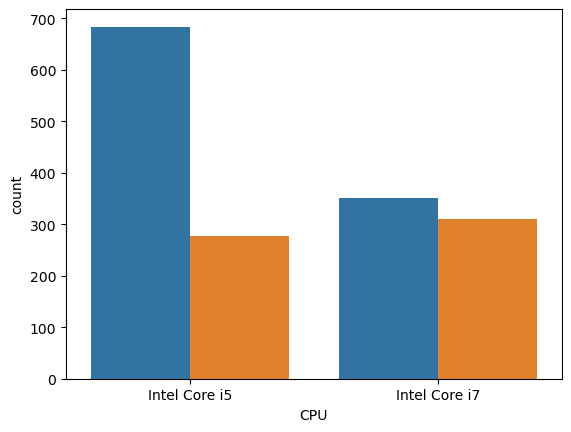

In [182]:
sns.countplot(x=df_CO['CPU'], hue=df_CO['Операционная система']);

По графику явной закономерности не видно, но разница в частотах наблюдается.

Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.уга.

In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(CO)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что **связь между этими показателями является статистически значимой.**

### Связь типа процессора и страны производства
для оценки взаимосвязи показателей возьмем только самые популярные типы процессоров и страны производства.

In [ ]:
df_3['Страна производства'].value_counts()

In [183]:
df_3['counts'] = df_3['CPU'].map(df_3['CPU'].value_counts())
df_3['counts_2'] = df_3['Страна производства'].map(df_3['Страна производства'].value_counts())
df_CC = df_3.loc[(df_3['counts'] > 480)&(df_3['counts_2'] > 100)]

In [184]:
CC = pd.crosstab(df_CC['CPU'],df_CC['Страна производства'])
CC

Страна производства,0,1
CPU,,
AMD Ryzen 5,322,14
Intel Core i3,345,24
Intel Core i5,422,51
Intel Core i7,171,32


AttributeError: 'int' object has no attribute 'startswith'

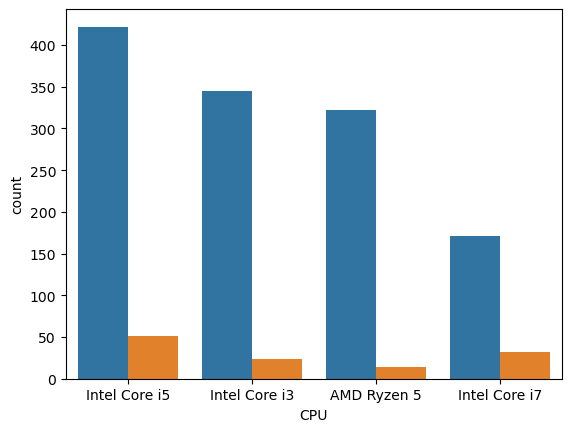

In [185]:
sns.countplot(x=df_CC['CPU'], hue=df_CC['Страна производства'])

Проверим наличие связи с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(CC)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что **связь между этими показателями является статистически значимой.**

### Связь типа оперативной памяти и объема твердотельного накопителя
для оценки взаимосвязи показателей возьмем только самые популярные типы процессоров и страны производства.

In [ ]:
df_3['RAM'].value_counts()

In [ ]:
df_3['size_of_SSD_GB'].value_counts()

In [186]:
df_3['counts'] = df_3['RAM'].map(df_3['RAM'].value_counts())
df_3['counts_2'] = df_3['size_of_SSD_GB'].map(df_3['size_of_SSD_GB'].value_counts())
df_RS = df_3.loc[(df_3['counts'] > 300)&(df_3['counts_2'] > 100)&(df_3['size_of_SSD_GB']!='960-1024')]

In [187]:
RS = pd.crosstab(df_RS['RAM'],df_RS['size_of_SSD_GB'])
RS

size_of_SSD_GB,120.0,250.0,500.0,1000.0
RAM,,,,
0,69,115,85,1
1,105,496,1437,882


AttributeError: 'numpy.float64' object has no attribute 'startswith'

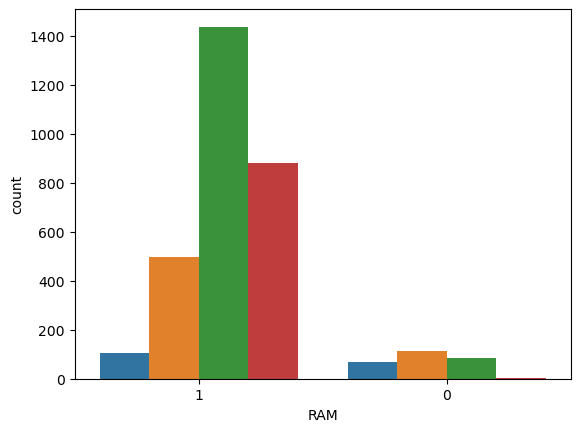

In [188]:
sns.countplot(x=df_RS['RAM'], hue=df_RS['size_of_SSD_GB']);

По графику явной закономерности не видно, но разница в частотах наблюдается.

Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.уга.

In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(RS)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что **связь между этими показателями является статистически значимой.**

### Связь типа оперативной памяти и видеопроцессора
для оценки взаимосвязи показателей возьмем только самые популярные типы процессоров и видеопроцессоров.

In [ ]:
df_3['Видеопроцессор'].value_counts()

In [189]:
df_3['counts'] = df_3['RAM'].map(df_3['RAM'].value_counts())
df_3['counts_2'] = df_3['Видеопроцессор'].map(df_3['Видеопроцессор'].value_counts())
df_RG = df_3.loc[(df_3['counts'] > 300)&(df_3['counts_2'] > 250)]

In [190]:
RG = pd.crosstab(df_RG['RAM'],df_RG['Видеопроцессор'])
RG

Видеопроцессор,NVIDIA GeForce GTX 1650,NVIDIA GeForce GTX 1660,NVIDIA GeForce RTX 3050,NVIDIA GeForce RTX 3060
RAM,,,,
0,1,23,10,7
1,321,247,435,569


<Axes: xlabel='RAM', ylabel='count'>

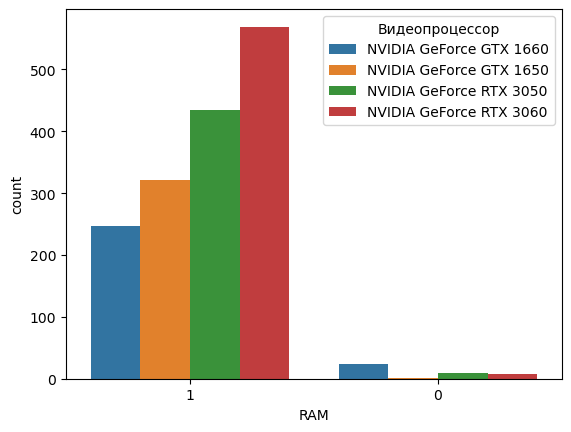

In [191]:
sns.countplot(x=df_RG['RAM'], hue=df_RG['Видеопроцессор'])

По графику явной закономерности не видно, но разница в частотах наблюдается.

В одном наблюдении частота < 5, поэтому применим точный критерий Фишера. Но сначала сократим таблицу сопряженности до размера 2x2.
(воспользоватья точным критерием Фишера для матриц больше, чем 2x2 не получилось, выдается ошибка)

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [192]:
df_3['counts'] = df_3['RAM'].map(df_3['RAM'].value_counts())
df_3['counts_2'] = df_3['Видеопроцессор'].map(df_3['Видеопроцессор'].value_counts())
df_RG = df_3.loc[(df_3['counts'] > 300)&(df_3['counts_2'] > 400)]
RG = pd.crosstab(df_RG['RAM'],df_RG['Видеопроцессор'])
RG

Видеопроцессор,NVIDIA GeForce RTX 3050,NVIDIA GeForce RTX 3060
RAM,,
0,10,7
1,435,569


После сокращения матрицы сопряженности пропали и частоты < 5, поэтому можно применить критерий хи-квадрат.

In [193]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(RG)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 1.063292943662396
degrees of freedom: 1
p-value: 0.30246534068537734



pvalue > 0.05, поэтому нулевая гипотеза о равенстве частот принимается.

То есть мы можем вынести решение о том, что **статистически значимая связь между этими показателями отсутствует.**

### Связь типа оперативной памяти и операционной системы
для оценки взаимосвязи показателей возьмем только самые популярные типы процессоров и типы операционной системы.

In [194]:
df_3['Операционная система'].value_counts()

Операционная система
0    2151
1     703
2     261
3     144
4      36
5      28
Name: count, dtype: int64

Наблюдений со значением 'windows 11 pro' получается слишком мало для оценки, поэтому объединим все windows 11 и все windows 10 в одну группу.

In [241]:
df_3.loc[df_3['Операционная система']=='0', 'Операционная система'] = '0'
df_3.loc[df_3['Операционная система']=='1', 'Операционная система'] = '1'
df_3.loc[df_3['Операционная система']=='2', 'Операционная система'] = '2'
df_3.loc[df_3['Операционная система']=='3', 'Операционная система'] = '3'
df_3['Операционная система'].value_counts()

Операционная система
0    2151
1     703
2     261
3     144
4      36
5      28
Name: count, dtype: int64

In [242]:
df_3['counts'] = df_3['RAM'].map(df_3['RAM'].value_counts())
df_3['counts_2'] = df_3['Операционная система'].map(df_3['Операционная система'].value_counts())
df_RO = df_3.loc[(df_3['counts'] > 300)&(df_3['counts_2'] > 300)]

In [243]:
RO = pd.crosstab(df_RO['RAM'],df_RO['Операционная система'])
RO

Операционная система,0,1
RAM,,
0,291,2
1,1848,654


AttributeError: 'int' object has no attribute 'startswith'

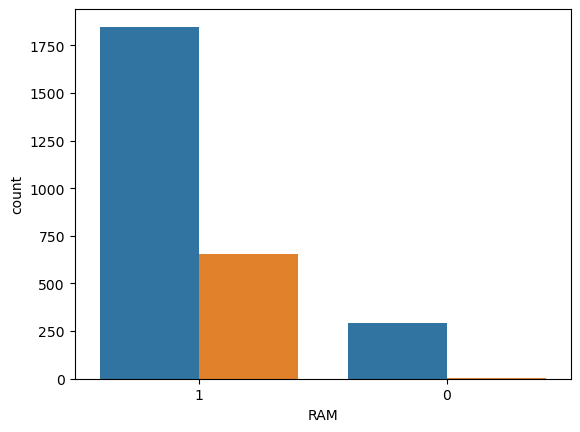

In [244]:
sns.countplot(x=df_RO['RAM'], hue=df_RO['Операционная система']);

По графику явной закономерности не видно, но разница в частотах наблюдается.

В одном наблюдении частота < 5, поэтому для проверки, существует или нет связь между показателями, применим точный критерий Фишера.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [245]:
print(stats.fisher_exact(RO))

SignificanceResult(statistic=51.491883116883116, pvalue=6.164852419150142e-33)


pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что связь между этими показателями является статистически значимой.

### Связь типа оперативной памяти и страны производства.
для оценки взаимосвязи показателей возьмем только самые популярные типы процессоров и страны производства.

In [246]:
df_3['Страна производства'].value_counts()

Страна производства
0    1626
1     148
2       5
4       1
Name: count, dtype: Int64

In [247]:
df_3['counts'] = df_3['RAM'].map(df_3['RAM'].value_counts())
df_3['counts_2'] = df_3['Страна производства'].map(df_3['Страна производства'].value_counts())
df_RC = df_3.loc[(df_3['counts'] > 300)&(df_3['counts_2'] > 100)]

In [248]:
RC = pd.crosstab(df_RC['RAM'],df_RC['Страна производства'])
RC

Страна производства,0,1
RAM,,
0,235,53
1,1323,84


AttributeError: 'int' object has no attribute 'startswith'

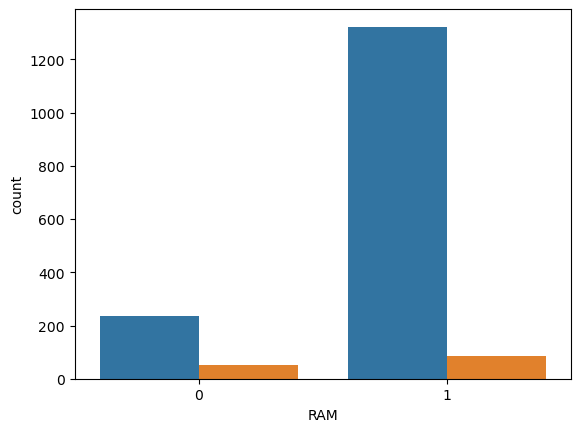

In [249]:
sns.countplot(x=df_RC['RAM'], hue=df_RC['Страна производства'])

По графику также видна существенная разница в частотах. Проверим это с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [250]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(RC)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 48.07929129053081
degrees of freedom: 1
p-value: 4.093268588635109e-12



pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что **связь между этими показателями является статистически значимой.**

### Связь объема твердотельного накопителя и видеопроцессора.
для оценки взаимосвязи показателей возьмем только самые популярные объемы твердотельного накопителя и типа видеопроцессора.

In [251]:
df_3['size_of_SSD_GB'].value_counts()

size_of_SSD_GB
500.0     1550
1000.0     897
250.0      641
120.0      187
Name: count, dtype: int64

In [252]:
df_3['Видеопроцессор'].value_counts()

Видеопроцессор
NVIDIA GeForce RTX 3060    581
NVIDIA GeForce RTX 3050    447
NVIDIA GeForce GTX 1650    322
NVIDIA GeForce GTX 1660    271
AMD Radeon Vega 7          212
                          ... 
NVIDIA GeForce RTX 4080      1
Intel UHD Graphics           1
RX 460                       1
AMD Radeon Vega 6            1
NVIDIA GeForce GTX 970       1
Name: count, Length: 71, dtype: int64

In [253]:
df_3['counts'] = df_3['size_of_SSD_GB'].map(df_3['size_of_SSD_GB'].value_counts())
df_3['counts_2'] = df_3['Видеопроцессор'].map(df_3['Видеопроцессор'].value_counts())
df_SG = df_3.loc[(df_3['counts'] > 500)&(df_3['counts_2'] > 230)]

In [254]:
SG = pd.crosstab(df_SG['size_of_SSD_GB'],df_SG['Видеопроцессор'])
SG

Видеопроцессор,NVIDIA GeForce GTX 1650,NVIDIA GeForce GTX 1660,NVIDIA GeForce RTX 3050,NVIDIA GeForce RTX 3060
size_of_SSD_GB,,,,
250.0,67,43,60,42
500.0,145,61,238,336
1000.0,91,161,140,203


<Axes: xlabel='size_of_SSD_GB', ylabel='count'>

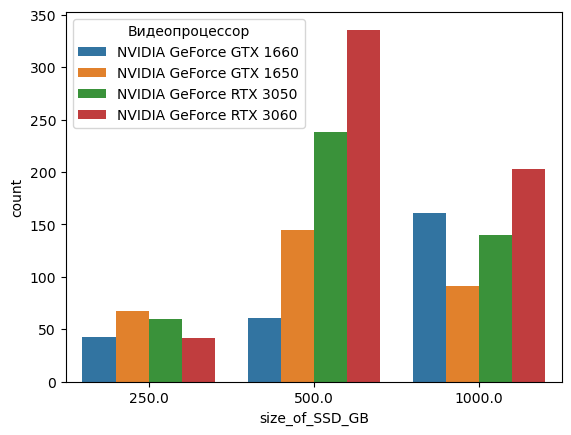

In [255]:
sns.countplot(x=df_SG['size_of_SSD_GB'], hue=df_SG['Видеопроцессор'])

По графику видно, что у неоторых объемов видна существенная разница в частотах, у некоторых частоты примерно одинаковые.

Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [256]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(SG)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 130.9450506411485
degrees of freedom: 6
p-value: 8.128233560646353e-26



pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, чт**о связь между этими показателями является статистически значимо**й.

### Связь объема твердотельного накопителя и операционной системы
Для оценки взаимосвязи показателей возьмем только самые популярные объемы твердотельного накопителя и виды операционных систем.

In [257]:
df_3['Операционная система'].value_counts()

Операционная система
0    2151
1     703
2     261
3     144
4      36
5      28
Name: count, dtype: int64

In [258]:
df_3['counts'] = df_3['size_of_SSD_GB'].map(df_3['size_of_SSD_GB'].value_counts())
df_3['counts_2'] = df_3['Операционная система'].map(df_3['Операционная система'].value_counts())
df_SO = df_3.loc[(df_3['counts'] > 500)&(df_3['counts_2'] > 200)&(df_3['Операционная система']!='отсутствует')]

In [259]:
SO = pd.crosstab(df_SO['size_of_SSD_GB'],df_SO['Операционная система'])
SO

Операционная система,0,1,2
size_of_SSD_GB,,,
250.0,456,70,40
500.0,1217,94,153
1000.0,292,529,61


AttributeError: 'int' object has no attribute 'startswith'

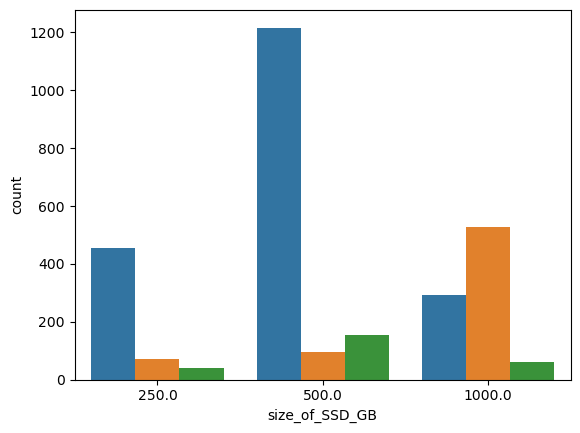

In [260]:
sns.countplot(x=df_SO['size_of_SSD_GB'], hue=df_SO['Операционная система'])

По графику видно, что разница в частотах есть.
Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [261]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(SO)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 933.97021033582
degrees of freedom: 4
p-value: 7.26403160893665e-201



pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что **связь между этими показателями является статистически значимой.**

### Связь объема твердотельного накопителя и страны производства
для оценки взаимосвязи показателей возьмем только самые популярные объемы твердотельного накопителя и страны производства.

In [262]:
df_3['Страна производства'].value_counts()

Страна производства
0    1626
1     148
2       5
4       1
Name: count, dtype: Int64

In [263]:
df_3['counts'] = df_3['size_of_SSD_GB'].map(df_3['size_of_SSD_GB'].value_counts())
df_3['counts_2'] = df_3['Страна производства'].map(df_3['Страна производства'].value_counts())
df_SC = df_3.loc[(df_3['counts'] > 500)&(df_3['counts_2'] > 100)]

In [264]:
SC = pd.crosstab(df_SC['size_of_SSD_GB'],df_SC['Страна производства'])
SC

Страна производства,0,1
size_of_SSD_GB,,
250.0,328,48
500.0,816,56
1000.0,301,30


AttributeError: 'int' object has no attribute 'startswith'

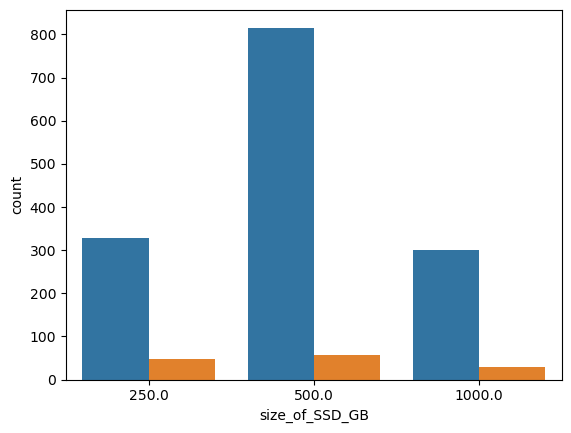

In [265]:
sns.countplot(x=df_SC['size_of_SSD_GB'], hue=df_SC['Страна производства'])

По графику видно, что есть достаточно большая разница в частотах.
Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [266]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(SC)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 13.793995314781611
degrees of freedom: 2
p-value: 0.001010815692851887



pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, чт**о связь между этими показателями является статистически значимо**й.

### Связь видеопроцессора и операционной системы
для оценки взаимосвязи показателей возьмем только самые популярные видеопроцессора и операционной системы.

In [267]:
df_3['Видеопроцессор'].value_counts()

Видеопроцессор
NVIDIA GeForce RTX 3060    581
NVIDIA GeForce RTX 3050    447
NVIDIA GeForce GTX 1650    322
NVIDIA GeForce GTX 1660    271
AMD Radeon Vega 7          212
                          ... 
NVIDIA GeForce RTX 4080      1
Intel UHD Graphics           1
RX 460                       1
AMD Radeon Vega 6            1
NVIDIA GeForce GTX 970       1
Name: count, Length: 71, dtype: int64

In [268]:
df_3['Операционная система'].value_counts()

Операционная система
0    2151
1     703
2     261
3     144
4      36
5      28
Name: count, dtype: int64

In [269]:
df_3['counts'] = df_3['Видеопроцессор'].map(df_3['Видеопроцессор'].value_counts())
df_3['counts_2'] = df_3['Операционная система'].map(df_3['Операционная система'].value_counts())
df_GO = df_3.loc[(df_3['counts'] > 230)&(df_3['counts_2'] > 200)&(df_3['Операционная система']!='отсутствует')]

In [270]:
GO = pd.crosstab(df_GO['Видеопроцессор'],df_GO['Операционная система'])
GO

Операционная система,0,1,2
Видеопроцессор,,,
NVIDIA GeForce GTX 1650,210,75,26
NVIDIA GeForce GTX 1660,165,79,25
NVIDIA GeForce RTX 3050,316,71,51
NVIDIA GeForce RTX 3060,397,156,15


AttributeError: 'int' object has no attribute 'startswith'

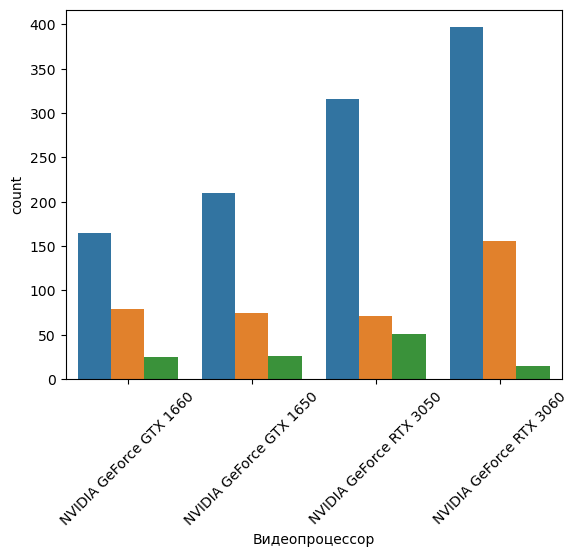

In [271]:
plt.xticks(fontsize = 10, rotation = 45)
sns.countplot(x=df_GO['Видеопроцессор'], hue=df_GO['Операционная система'])

По графику видно, что есть достаточно большая разница в частотах.
Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [272]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(GO)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 50.02016173525644
degrees of freedom: 6
p-value: 4.6575204673484544e-09



pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, чт**о связь между этими показателями является статистически значимо**й.

### Связь видеопроцессора и страны производства
для оценки взаимосвязи показателей возьмем только самые популярные видеопроцессора и страны производства.

In [273]:
df_3['Страна производства'].value_counts()

Страна производства
0    1626
1     148
2       5
4       1
Name: count, dtype: Int64

Соркащаем матрицу до размера 2x2, чтобы применить точный критерий Фишера, так как в 4x2 появляется частота, меньше 5.

In [275]:
df_3['counts'] = df_3['Видеопроцессор'].map(df_3['Видеопроцессор'].value_counts())
df_3['counts_2'] = df_3['Страна производства'].map(df_3['Страна производства'].value_counts())
df_GC = df_3.loc[(df_3['counts'] > 400)&(df_3['counts_2'] > 100)]
GC = pd.crosstab(df_GC['Видеопроцессор'],df_GC['Страна производства'])
GC

Страна производства,0,1
Видеопроцессор,,
NVIDIA GeForce RTX 3050,167,24
NVIDIA GeForce RTX 3060,111,30


Теперь видно, что частоты меньше 5 отсутствуют. Поэтому можно будет применить критерий хи-квадрат.

AttributeError: 'int' object has no attribute 'startswith'

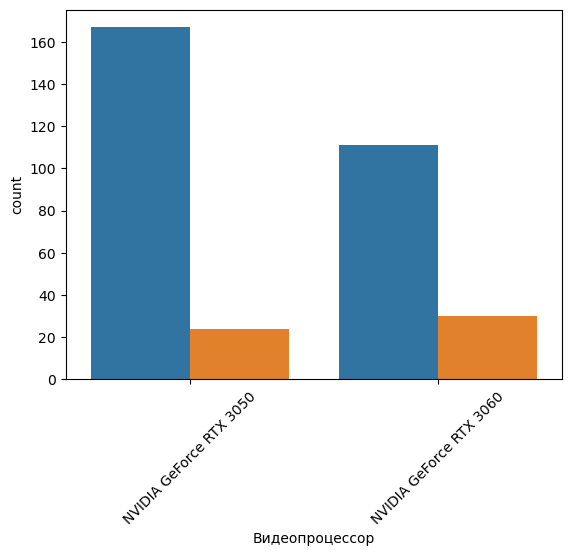

In [276]:
plt.xticks(fontsize = 10, rotation = 45)
sns.countplot(x=df_GC['Видеопроцессор'], hue=df_GC['Страна производства'])

По графику видно, что есть достаточно большая разница в частотах.
Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [277]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(GC)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 3.9026538723472743
degrees of freedom: 1
p-value: 0.048209895985996926



pvalue > 0.05, поэтому нулевая гипотеза о равенстве частот принимается.

То есть мы можем вынести решение о том, что **статистически значимая связь между этими показателями отсутствует.**

### Связь типа процессора ('CPU') и количества продаж ('sales')
для оценки взаимосвязи показателей возьмем только самые популярные количества ядер процесоора и самые часто встречающиеся минимальные отметки продаж.

In [278]:
df_3['cores'].value_counts()

cores
6.0     1406
4.0      741
8.0      419
12.0     273
2.0      250
10.0     103
24.0      60
16.0      45
14.0       7
20.0       7
Name: count, dtype: int64

In [279]:
df_3['sales'].value_counts()

sales
2.0      432
5.0      138
10.0      88
20.0      39
30.0      16
100.0     16
40.0      15
50.0       9
80.0       7
200.0      5
90.0       3
400.0      3
500.0      3
800.0      2
300.0      2
70.0       2
60.0       1
Name: count, dtype: int64

In [280]:
df_3['counts'] = df_3['cores'].map(df_3['cores'].value_counts())
df_3['counts_2'] = df_3['sales'].map(df_3['sales'].value_counts())
df_CS = df_3.loc[(df_3['counts'] > 300)&(df_3['counts_2'] > 40)]
CS = pd.crosstab(df_CS['cores'],df_CS['sales'])
CS

sales,2.0,5.0,10.0
cores,,,
4.0,143,32,26
6.0,162,61,39
8.0,38,7,5


AttributeError: 'numpy.float64' object has no attribute 'startswith'

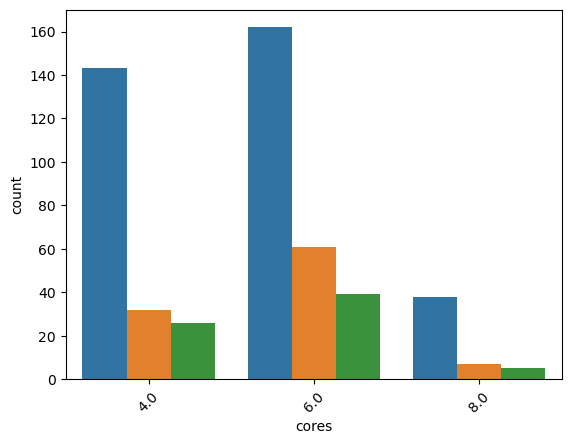

In [281]:
plt.xticks(fontsize = 10, rotation = 45)
sns.countplot(x=df_CS['cores'], hue=df_CS['sales'])

Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [282]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(CS)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 7.043693933156196
degrees of freedom: 4
p-value: 0.13359713866696285



pvalue > 0.05, поэтому нулевая гипотеза о равенстве частот принимается.

То есть мы можем вынести решение о том, что **статистически значимая связь между этими показателями отсутствует.**

### Связь типа процессора ('CPU') и количества ядер ('cores')
для оценки взаимосвязи показателей возьмем только самые популярные типы процессора и количества ядер.

In [283]:
df_3['CPU'].value_counts()

CPU
Intel Core i5        1091
Intel Core i7         680
Intel Core i3         490
AMD Ryzen 5           486
AMD Athlon            120
Intel Xeon             73
AMD Ryzen 7            71
AMD Ryzen 3            52
AMD A6                 45
Intel Pentium          38
Intel E5               22
Intеl Core Quad        17
Intel Core i9          12
Intel E3               11
Intel Celeron           7
AMD Ryzen 9             4
AMD A12-9800E           4
Intel                   4
AMD Ryzen 6             2
AMD FX-6100             2
AMD E1-6010             2
AMD Radeon RX 570       2
Intel N5105             1
AMD A10-5800K           1
AMD FX-4300             1
Name: count, dtype: int64

In [284]:
df_3['cores'].value_counts()

cores
6.0     1406
4.0      741
8.0      419
12.0     273
2.0      250
10.0     103
24.0      60
16.0      45
14.0       7
20.0       7
Name: count, dtype: int64

In [285]:
df_3['counts'] = df_3['CPU'].map(df_3['CPU'].value_counts())
df_3['counts_2'] = df_3['cores'].map(df_3['cores'].value_counts())
df_CC2 = df_3.loc[(df_3['counts'] > 490)&(df_3['counts_2'] > 500)]
cc2 = pd.crosstab(df_CC2['CPU'],df_CC2['cores'])
cc2

cores,4.0,6.0
CPU,,
Intel Core i5,105,871
Intel Core i7,30,36


AttributeError: 'numpy.float64' object has no attribute 'startswith'

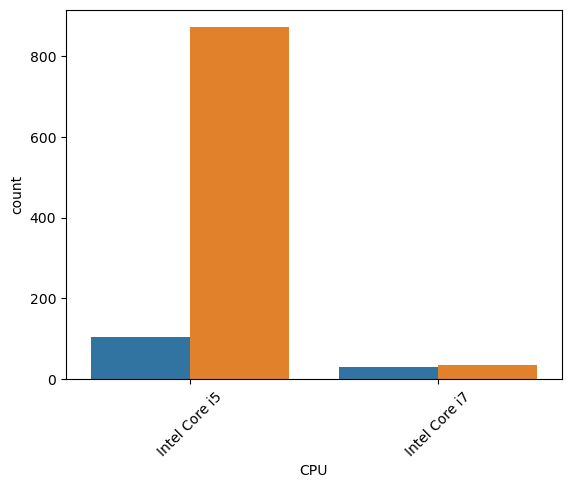

In [286]:
plt.xticks(fontsize = 10, rotation = 45)
sns.countplot(x=df_CC2['CPU'], hue=df_CC2['cores'])

Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [287]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(cc2)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 62.9507040857502
degrees of freedom: 1
p-value: 2.119452765890567e-15



pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что **связь между этими показателями является статистически значимой.**

### Связь типа процессора ('CPU') и объема оперативной памяти ('size_of_RAM_GB')
для оценки взаимосвязи показателей возьмем только самые популярные типы процессора и объемы оперативной памяти.

In [288]:
df_3['CPU'].value_counts()

CPU
Intel Core i5        1091
Intel Core i7         680
Intel Core i3         490
AMD Ryzen 5           486
AMD Athlon            120
Intel Xeon             73
AMD Ryzen 7            71
AMD Ryzen 3            52
AMD A6                 45
Intel Pentium          38
Intel E5               22
Intеl Core Quad        17
Intel Core i9          12
Intel E3               11
Intel Celeron           7
AMD Ryzen 9             4
AMD A12-9800E           4
Intel                   4
AMD Ryzen 6             2
AMD FX-6100             2
AMD E1-6010             2
AMD Radeon RX 570       2
Intel N5105             1
AMD A10-5800K           1
AMD FX-4300             1
Name: count, dtype: int64

In [289]:
df_3['size_of_RAM_GB'].value_counts()

size_of_RAM_GB
16      1980
32       657
8        538
4        107
64        38
6          2
1000       1
Name: count, dtype: int64

In [290]:
df_3['counts'] = df_3['CPU'].map(df_3['CPU'].value_counts())
df_3['counts_2'] = df_3['size_of_RAM_GB'].map(df_3['size_of_RAM_GB'].value_counts())
df_CR = df_3.loc[(df_3['counts'] > 400)&(df_3['counts_2'] > 500)]
CR = pd.crosstab(df_CR['CPU'],df_CR['size_of_RAM_GB'])
CR

size_of_RAM_GB,8,16,32
CPU,,,
AMD Ryzen 5,32,275,161
Intel Core i3,191,243,27
Intel Core i5,94,770,193
Intel Core i7,41,400,216


AttributeError: 'numpy.int64' object has no attribute 'startswith'

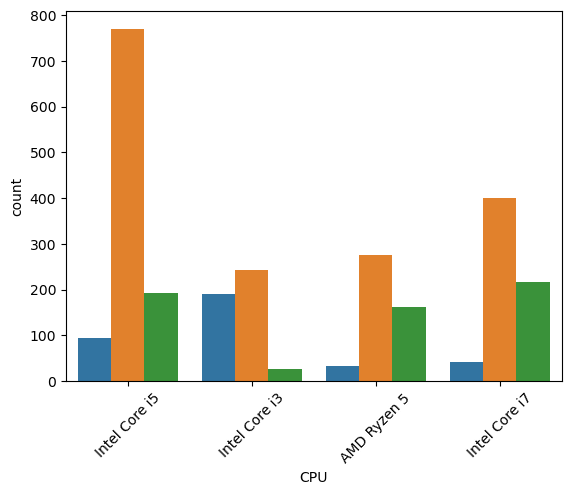

In [291]:
plt.xticks(fontsize = 10, rotation = 45)
sns.countplot(x=df_CR['CPU'], hue=df_CR['size_of_RAM_GB'])

Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [292]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(CR)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 473.7470734041019
degrees of freedom: 6
p-value: 3.79140379377743e-99



pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что **связь между этими показателями является статистически значимой.**

### Связь типа процессора ('CPU') и объема жесткого диска ('size_of_HDD_GB')
для оценки взаимосвязи показателей возьмем только самые популярные типы процессора и объемы жесткого диска.

In [293]:
df_3['CPU'].value_counts()

CPU
Intel Core i5        1091
Intel Core i7         680
Intel Core i3         490
AMD Ryzen 5           486
AMD Athlon            120
Intel Xeon             73
AMD Ryzen 7            71
AMD Ryzen 3            52
AMD A6                 45
Intel Pentium          38
Intel E5               22
Intеl Core Quad        17
Intel Core i9          12
Intel E3               11
Intel Celeron           7
AMD Ryzen 9             4
AMD A12-9800E           4
Intel                   4
AMD Ryzen 6             2
AMD FX-6100             2
AMD E1-6010             2
AMD Radeon RX 570       2
Intel N5105             1
AMD A10-5800K           1
AMD FX-4300             1
Name: count, dtype: int64

In [294]:
df_3['size_of_HDD_GB'].value_counts()

size_of_HDD_GB
1000.0    947
500.0     109
2000.0     28
250.0       3
3000.0      1
Name: count, dtype: int64

In [295]:
df_3['counts'] = df_3['CPU'].map(df_3['CPU'].value_counts())
df_3['counts_2'] = df_3['size_of_HDD_GB'].map(df_3['size_of_HDD_GB'].value_counts())
df_CH = df_3.loc[(df_3['counts'] > 490)&(df_3['counts_2'] > 100)]
CH = pd.crosstab(df_CH['CPU'],df_CH['size_of_HDD_GB'])
CH

size_of_HDD_GB,500.0,1000.0
CPU,,
Intel Core i5,29,364
Intel Core i7,24,228


AttributeError: 'numpy.float64' object has no attribute 'startswith'

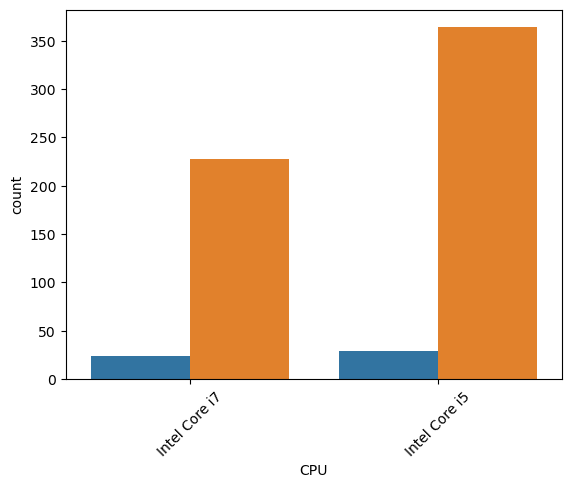

In [296]:
plt.xticks(fontsize = 10, rotation = 45)
sns.countplot(x=df_CH['CPU'], hue=df_CH['size_of_HDD_GB'])

Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [297]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(CH)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 0.6736550659583531
degrees of freedom: 1
p-value: 0.41178017973468406



pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что **связь между этими показателями является статистически значимой.**

### Связь типа процессора ('CPU') и гарантийного срока
для оценки взаимосвязи показателей возьмем только самые популярные типы процессора и сроки гарантии.

In [298]:
df_3['CPU'].value_counts()

CPU
Intel Core i5        1091
Intel Core i7         680
Intel Core i3         490
AMD Ryzen 5           486
AMD Athlon            120
Intel Xeon             73
AMD Ryzen 7            71
AMD Ryzen 3            52
AMD A6                 45
Intel Pentium          38
Intel E5               22
Intеl Core Quad        17
Intel Core i9          12
Intel E3               11
Intel Celeron           7
AMD Ryzen 9             4
AMD A12-9800E           4
Intel                   4
AMD Ryzen 6             2
AMD FX-6100             2
AMD E1-6010             2
AMD Radeon RX 570       2
Intel N5105             1
AMD A10-5800K           1
AMD FX-4300             1
Name: count, dtype: int64

In [299]:
df_3['Гарантийный срок(мес.)'].value_counts()

Гарантийный срок(мес.)
36.0    1261
12.0     819
24.0      47
6.0        5
3.0        2
1.0        2
2.0        1
Name: count, dtype: int64

In [300]:
df_3['counts'] = df_3['CPU'].map(df_3['CPU'].value_counts())
df_3['counts_2'] = df_3['Гарантийный срок(мес.)'].map(df_3['Гарантийный срок(мес.)'].value_counts())
df_CG = df_3.loc[(df_3['counts'] > 400)&(df_3['counts_2'] > 100)]
CG = pd.crosstab(df_CG['CPU'],df_CG['Гарантийный срок(мес.)'])
CG

Гарантийный срок(мес.),12.0,36.0
CPU,,
AMD Ryzen 5,97,294
Intel Core i3,137,312
Intel Core i5,245,334
Intel Core i7,105,124


AttributeError: 'numpy.float64' object has no attribute 'startswith'

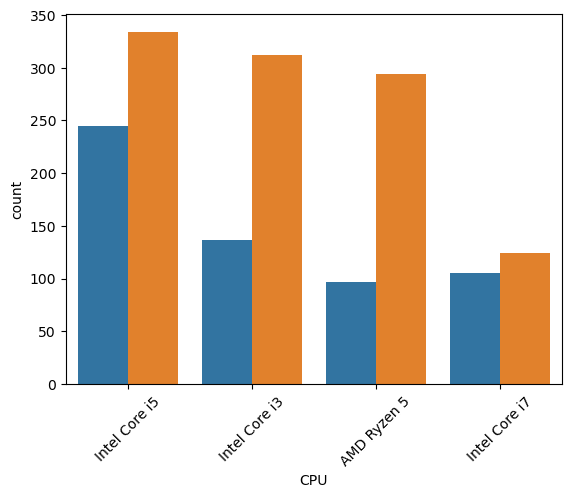

In [301]:
plt.xticks(fontsize = 10, rotation = 45)
sns.countplot(x=df_CG['CPU'], hue=df_CG['Гарантийный срок(мес.)'])

Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [302]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(CG)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 46.891975579886505
degrees of freedom: 3
p-value: 3.664445142512558e-10



pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что **связь между этими показателями является статистически значимой.**

### Связь типа процессора ('CPU') и рейтинга продавца ('seller_rating')
для оценки взаимосвязи показателей возьмем только самые популярные типы процессора и рейтинги продавца.

In [303]:
df_3['seller_rating'].value_counts()

seller_rating
4.7    1518
0.0     601
4.1     289
4.2     241
5.0     163
4.5     121
4.9     110
4.8     104
4.4      45
4.3      26
3.7       5
3.5       4
3.9       3
4.6       2
4.0       2
3.0       2
3.3       1
1.5       1
Name: count, dtype: int64

In [304]:
df_3['counts'] = df_3['CPU'].map(df_3['CPU'].value_counts())
df_3['counts_2'] = df_3['seller_rating'].map(df_3['seller_rating'].value_counts())
df_CR = df_3.loc[(df_3['counts'] > 400)&(df_3['counts_2'] > 240)&(df_3['seller_rating']!=0.0)]
CR = pd.crosstab(df_CR['CPU'],df_CR['seller_rating'])
CR

seller_rating,4.1,4.2,4.7
CPU,,,
AMD Ryzen 5,6,34,331
Intel Core i3,73,75,229
Intel Core i5,74,45,520
Intel Core i7,68,24,232


AttributeError: 'numpy.float64' object has no attribute 'startswith'

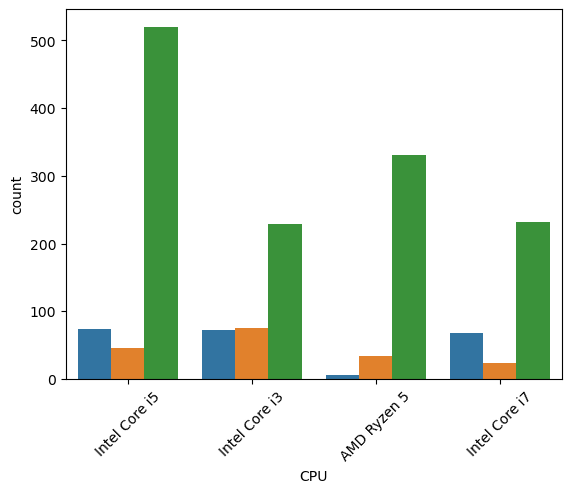

In [305]:
plt.xticks(fontsize = 10, rotation = 45)
sns.countplot(x=df_CR['CPU'], hue=df_CR['seller_rating'])

Проверим связь с помощью критерия хи-квадрат.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [306]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(CR)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 131.9694506331457
degrees of freedom: 6
p-value: 4.945568832708028e-26



pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что **связь между этими показателями является статистически значимой.**

### Связь типа оперативной памяти ('RAM') и объема оперативной памяти ('size_of_RAM_GB')
для оценки взаимосвязи показателей возьмем только самые популярные типы и объемы оперативной памяти.


In [307]:
df_3['RAM'].value_counts()

RAM
1               2927
0                307
не заполнено      75
2                 14
Name: count, dtype: int64

In [308]:
df_3['size_of_RAM_GB'].value_counts()

size_of_RAM_GB
16      1980
32       657
8        538
4        107
64        38
6          2
1000       1
Name: count, dtype: int64

In [309]:
df_3['counts'] = df_3['RAM'].map(df_3['RAM'].value_counts())
df_3['counts_2'] = df_3['size_of_RAM_GB'].map(df_3['size_of_RAM_GB'].value_counts())
df_RS = df_3.loc[(df_3['counts'] > 300)&(df_3['counts_2'] > 600)]
RS = pd.crosstab(df_RS['RAM'],df_RS['size_of_RAM_GB'])
RS

size_of_RAM_GB,16,32
RAM,,
0,112,0
1,1826,653


AttributeError: 'numpy.int64' object has no attribute 'startswith'

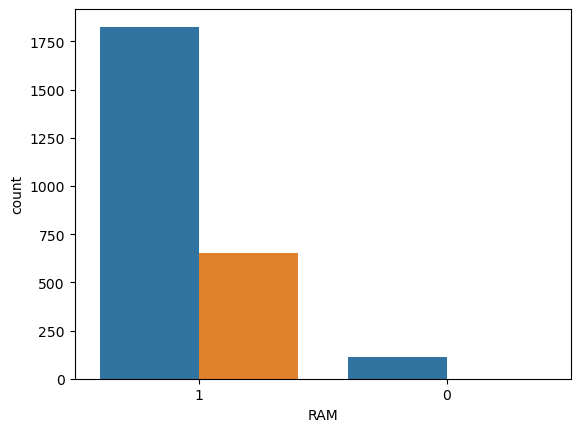

In [310]:
plt.xticks(fontsize = 10)
sns.countplot(x=df_RS['RAM'], hue=df_RS['size_of_RAM_GB'])

Проверим связь с помощью точного критерия Фишера, так как в одном признаке частота < 5.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [311]:
print(stats.fisher_exact(RS))

SignificanceResult(statistic=inf, pvalue=5.1843019311449605e-15)


pvalue < 0.05, поэтому отклоняется гипотеза о равенстве частот.

То есть мы можем вынести решение о том, что **связь между этими показателями является статистически значимой.**

### Связь 'size_of_HDD_GB' и 'size_of_SSD_GB'
для оценки взаимосвязи показателей возьмем только самые популярные объемы жесткого диска и твердотельного накопителя.

In [312]:
df_3['size_of_HDD_GB'].value_counts()

size_of_HDD_GB
1000.0    947
500.0     109
2000.0     28
250.0       3
3000.0      1
Name: count, dtype: int64

In [313]:
df_3['size_of_SSD_GB'].value_counts()

size_of_SSD_GB
500.0     1550
1000.0     897
250.0      641
120.0      187
Name: count, dtype: int64

In [314]:
df_3['counts'] = df_3['size_of_HDD_GB'].map(df_3['size_of_HDD_GB'].value_counts())
df_3['counts_2'] = df_3['size_of_SSD_GB'].map(df_3['size_of_SSD_GB'].value_counts())
df_HS = df_3.loc[(df_3['counts'] > 100)&(df_3['counts_2'] > 650)]
HS = pd.crosstab(df_HS['size_of_HDD_GB'],df_HS['size_of_SSD_GB'])
HS

size_of_SSD_GB,500.0,1000.0
size_of_HDD_GB,,
500.0,34,1
1000.0,677,16


AttributeError: 'numpy.float64' object has no attribute 'startswith'

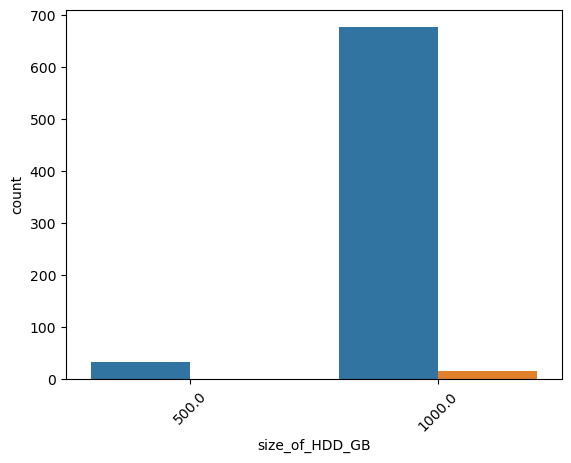

In [315]:
plt.xticks(fontsize = 10, rotation = 45)
sns.countplot(x=df_HS['size_of_HDD_GB'], hue=df_HS['size_of_SSD_GB'])

Проверим связь с помощью точного критерия Фишера, так как в одном признаке частота < 5.

> Гипотеза H0: частоты рассматриваемых признаков примерно равны, т.е. признаки не влияют друг на друга.

In [316]:
print(stats.fisher_exact(HS))

SignificanceResult(statistic=0.8035450516986706, pvalue=0.5713830280884419)


pvalue > 0.05, поэтому нулевая гипотеза о равенстве частот принимается.

То есть мы можем вынести решение о том, чт**о статистически значимая связь между этими показателями отсутствуе**т.

### **Выводы:**

В результате исследования обнаружена связь между следующими категориальными факторами:
* 'CPU' и 'RAM'
* 'CPU' и 'size_of_SSD_GB'
* 'CPU' и 'Видеопроцессор'
* 'CPU' и 'Операционная система'
* 'CPU' и 'Страна производства'
* 'CPU' и 'cores'
* 'CPU' и 'size_of_RAM_GB'
* 'CPU' и 'size_of_HDD_GB'
* 'RAM' и 'size_of_SSD_GB'
* 'RAM' и 'Операционная система'
* 'RAM' и 'Страна производства'
* 'RAM' и 'size_of_RAM_GB'
* 'size_of_SSD_GB' и 'Видеопроцессор'
* 'size_of_SSD_GB' и 'Операционная система'
* 'size_of_SSD_GB' и 'Страна производства'
* 'Видеопроцессор' и 'Операционная система'

## Регрессионный анализ

### Подготовка признаков перед моделированием.

In [317]:
df_4 = df_3.copy()
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3323 non-null   object 
 1   price_rur               3323 non-null   int64  
 2   sales                   781 non-null    float64
 3   seller_rating           3238 non-null   float64
 4   CPU                     3238 non-null   object 
 5   cores                   3311 non-null   float64
 6   RAM                     3323 non-null   object 
 7   size_of_RAM_GB          3323 non-null   int64  
 8   size_of_HDD_GB          1088 non-null   float64
 9   size_of_SSD_GB          3275 non-null   float64
 10  Видеопроцессор          3323 non-null   object 
 11  Операционная система    3323 non-null   object 
 12  Страна производства     1780 non-null   Int64  
 13  Гарантийный срок(мес.)  2137 non-null   float64
 14  counts                  1088 non-null   

#### 'RAM'

In [318]:
df_4['RAM'].str.count('не заполнено').sum()

75

In [319]:
df_4.shape

(3323, 16)

Значений "не заполнено" немного, можно удалить из датасета эти наблюдения, так как нам точно не известно, по какой причине не указан тип оперативной памяти.

In [320]:
df_4 = df_4[df_4['RAM'] != 'не заполнено']
df_4.shape

(3248, 16)

In [321]:
df_4['RAM'].value_counts()

RAM
1    2927
0     307
2      14
Name: count, dtype: int64

#### 'size_of_SSD_GB'

In [322]:
df_4['size_of_SSD_GB'].value_counts()

size_of_SSD_GB
500.0     1523
1000.0     896
250.0      611
120.0      174
Name: count, dtype: int64

In [323]:
df_4['size_of_SSD_GB'].isna().sum()

44

Наблюдений с пропусками не очень много относительно общего объема выборки, поэтому удаляем такие наблюдения.

In [324]:
df_4.dropna(subset='size_of_SSD_GB', inplace=True)
df_4.size_of_SSD_GB.dtypes

dtype('float64')

### Множественная регрессия

In [325]:
df_4['cores'].isna().sum()

6

In [326]:
df_4['sales'].isna().sum()

2457

In [327]:
df_4['size_of_HDD_GB'].isna().sum()

2177

In [328]:
df_4['size_of_RAM_GB'].isna().sum()

0

In [329]:
df_4['Гарантийный срок(мес.)'].isna().sum()

1172

В данных слишком много пропусков по признакам 'size_of_HDD_GB' и 'Гарантийный срок(мес.)' и 'sales', поэтому не будем включать их в модель регрессии.

In [330]:
df_4.dropna(subset=['size_of_RAM_GB','cores'], inplace=True)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3198 entries, 3 to 3322
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3198 non-null   object 
 1   price_rur               3198 non-null   int64  
 2   sales                   743 non-null    float64
 3   seller_rating           3122 non-null   float64
 4   CPU                     3121 non-null   object 
 5   cores                   3198 non-null   float64
 6   RAM                     3198 non-null   object 
 7   size_of_RAM_GB          3198 non-null   int64  
 8   size_of_HDD_GB          1026 non-null   float64
 9   size_of_SSD_GB          3198 non-null   float64
 10  Видеопроцессор          3198 non-null   object 
 11  Операционная система    3198 non-null   object 
 12  Страна производства     1660 non-null   Int64  
 13  Гарантийный срок(мес.)  2028 non-null   float64
 14  counts                  1026 non-null   float

In [333]:
df_4.head()

,title,price_rur,sales,seller_rating,CPU,cores,RAM,size_of_RAM_GB,size_of_HDD_GB,size_of_SSD_GB,Видеопроцессор,Операционная система,Страна производства,Гарантийный срок(мес.),counts,counts_2
3,Офисный Компьютер Robotcomp Казначей V1,39237,10.0,4.7,Intel Core i5,6.0,1,8,NaN,500.0,Intel UHD Graphics 630,2,0,36.0,NaN,1550.0
4,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200.0,4.7,Intel Core i5,6.0,1,16,NaN,1000.0,NVIDIA GeForce GTX 1660,2,0,36.0,NaN,897.0
5,Игровой Компьютер Robotcomp M-16 V1,55625,40.0,4.7,Intel Core i5,6.0,1,16,NaN,500.0,NVIDIA GeForce GTX 1650,2,0,36.0,NaN,1550.0
6,Игровой Компьютер Robotcomp Анаконда 2.0 V1,128284,5.0,4.7,Intel Core i5,10.0,1,16,NaN,1000.0,NVIDIA GeForce RTX 3070,2,0,36.0,NaN,897.0
7,Игровой Компьютер Robotcomp F22 Raptor V1,48386,30.0,4.7,Intel Core i3,4.0,1,16,NaN,500.0,NVIDIA GeForce GTX 1650,2,0,36.0,NaN,1550.0


In [331]:
LR = lm.LinearRegression()

In [332]:
X=df_4[['cores','seller_rating','size_of_RAM_GB']]
Y=df_4[['price_rur']]